In [1]:
import maboss
import ginsim

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-05-01`

In [2]:
import biolqm

# Model of the cellular network driving Th1 and Th17 cell specification

In [4]:
# Load the model
lrg = ginsim.load("/tmp/colomotowqh5g9bz_Model_Th1_Th17_November_2020.zginml")

In [5]:
# Convert the model to BioLQMlrg = ginsim.upload()
lqm = ginsim.to_biolqm(lrg)

In [8]:
# Display the regulatory graph
ginsim.show(lrg)

In [9]:
# Define reporter components
reporter_components = ["Tbet","RORGt", "STAT1", "STAT3", "STAT5A_b1", "STAT5A_b2", "STAT5B_b1", "STAT5B_b2", "IL17A", "IL17F", "IFNg"]

 ## 1 - Computation of the stable states for the wild-type and mutants of interest

### 1.1 - Computation of the stable states for the wild-type

In [14]:
# Find fixed points, also called stable states
fps = biolqm.fixpoints(lqm, autoconvert=False).project_on_components(reporter_components)
biolqm.states_to_dataframe(fps)

# Generation of a python dataframe containing all stable states, easy to filter.
fpsdf = biolqm.states_to_dataframe(biolqm.fixpoints(lqm, autoconvert=False))
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm, autoconvert=False).project_on_components(reporter_components))

# generation of a list of dictionaries for all stable states, easy to display.  
fpsdic = biolqm.fixpoints(lqm)

The stables states are stored in python structures. The following command returns the number of stable states found.

In [15]:
len(fpsdf)

4120

In [16]:
# Displaying the T cell commitment stable state on the regulatory graph (colour intensities represent qualitative levels)
ginsim.show(lrg,fpsdic[2000])

In [31]:
len(fpsdfproj)

25

In [32]:
# Generation of a table listing all stable states projected on reporter components
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     1     0      1      0      0      1
8       0     0     0      1      1      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1
15      0     0     0      1      0      1      1
16      0     1     0      1      0      1      1
17      1     0     0      1      0      1      1
18      1     1     0      1      0      1      1
19      0     0     0      1      1      1      1
20      0     1     0      1      1      1      1
21      1     0     0      1      1      1      1
22      1     1     0      1      1      1      1
23      1     1     1      1      0      1      1
24      1     1     1      1      1      1      1

### 1.2 - Defininition of mutant versions of the model and computation of the corresponding stable state patterns

We identified Smad2, NFAT2A and STAT5A as candidate genes modulating IL-17A vs IL-17F differential expression. 

In [82]:
#==================
# SMAD2_3 KNOCKDOWN
#==================

# Definition of Smad2_3 knock down mutants
lqm_Smad_0 = biolqm.perturbation(lqm, "Smad2%0")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Smad_0, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     1     0      1      0      0      1
8       1     1     1      0      0      0      0
9       1     1     1      1      0      0      1
10      0     0     0      1      0      1      1
11      0     1     0      1      0      1      1
12      1     0     0      1      0      1      1
13      1     1     0      1      0      1      1
14      1     1     1      1      0      1      1

In [84]:
#===========================
# SMAD2_3 ECTOPIC EXPRESSION
#===========================

# Definition of Smad2_3 ectopic expression mutants
lqm_Smad_1 = biolqm.perturbation(lqm, "Smad2%1")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Smad_1, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     0     0      1      1      0      1
8       0     1     0      1      0      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1
15      0     0     0      1      0      1      1
16      0     0     0      1      1      1      1
17      0     1     0      1      0      1      1
18      0     1     0      1      1      1      1
19      1     0     0      1      0      1      1
20      1     0     0      1      1      1      1
21      1     1     0      1      0      1      1
22      1     1     0      1      1      1      1
23      1     1     1      1      0      1      1
24      1     1     1      1      1      1      1

In [35]:
#==================
# NFAT2A KNOCKDOWN
#==================

# Definition of NFAT2A knock down mutants
lqm_NFAT2A_0 = biolqm.perturbation(lqm, "NFAT2A%0")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_NFAT2A_0, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     1     0      1      0      0      1
8       1     1     1      0      0      0      0
9       1     1     1      1      0      0      1
10      0     0     0      1      0      1      1
11      0     1     0      1      0      1      1
12      1     0     0      1      0      1      1
13      1     1     0      1      0      1      1
14      1     1     1      1      0      1      1

In [36]:
#==========================
# NFAT2A ECTOPIC EXPRESSION
#==========================

# Definition of NFAT2A ectopic expression at level 2 mutants
lqm_NFAT2A_2 = biolqm.perturbation(lqm, "NFAT2A%2")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_NFAT2A_2, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     1     0      1      0      0      1
8       0     0     0      1      1      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1
15      0     0     0      1      0      1      1
16      0     1     0      1      0      1      1
17      1     0     0      1      0      1      1
18      1     1     0      1      0      1      1
19      0     0     0      1      1      1      1
20      0     1     0      1      1      1      1
21      1     0     0      1      1      1      1
22      1     1     0      1      1      1      1
23      1     1     1      1      0      1      1
24      1     1     1      1      1      1      1

In [37]:
#==========================
# STAT5A ECTOPIC EXPRESSION
#==========================

# Definition of STAT5A ectopic expression at level 1 mutants
lqm_STAT5A_1 = biolqm.perturbation(lqm, "STAT5A%1")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_STAT5A_1, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     1     0      1      0      0      1
8       0     0     0      1      1      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1
15      0     0     0      1      0      1      1
16      0     1     0      1      0      1      1
17      1     0     0      1      0      1      1
18      1     1     0      1      0      1      1
19      0     0     0      1      1      1      1
20      0     1     0      1      1      1      1
21      1     0     0      1      1      1      1
22      1     1     0      1      1      1      1
23      1     1     1      1      0      1      1
24      1     1     1      1      1      1      1

In [38]:
#==================
# STAT5A KNOCKDOWN
#==================

# Definition of STAT5A knock down mutants
lqm_STAT5A_0 = biolqm.perturbation(lqm, "STAT5A%0")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_STAT5A_0, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     1     0      1      0      0      1
8       0     0     0      1      1      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1

In [39]:
#====================================================================
# SMAD2_3 ECTOPIC EXPRESSION AND NFAT2A ECTOPIC EXPRESSION AT LEVEL 2
#====================================================================

# Definition of double mutants, Smad2_3 ectopic expression & NFAT2A ectopic expression at level 2
lqm_Smad_1_NFAT2A_2 = biolqm.perturbation(lqm, "Smad2%1")
lqm_Smad_1_NFAT2A_2 = biolqm.perturbation(lqm_Smad_1_NFAT2A_2, "NFAT2A%2")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Smad_1_NFAT2A_2, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      1      0      1
7       0     1     0      1      1      0      1
8       1     0     0      1      1      0      1
9       1     1     0      1      1      0      1
10      1     1     1      0      0      0      0
11      1     1     1      1      0      0      1
12      1     1     1      1      1      0      1
13      0     0     0      1      1      1      1
14      0     1     0      1      1      1      1
15      1     0     0      1      1      1      1
16      1     1     0      1      1      1      1
17      1     1     1      1      1      1      1

In [40]:
#====================================================================
# SMAD2_3 ECTOPIC EXPRESSION AND STAT5A ECTOPIC EXPRESSION AT LEVEL 1
#====================================================================

# Definition of double mutants, Smad2_3 ectopic expression & STAT5A ectopic expression at level 1
lqm_Smad_1_STAT5A_1 = biolqm.perturbation(lqm, "Smad2%1")
lqm_Smad_1_STAT5A_1 = biolqm.perturbation(lqm_Smad_1_STAT5A_1, "STAT5A%1")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Smad_1_STAT5A_1, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     0     0      1      1      0      1
8       0     1     0      1      0      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1
15      0     0     0      1      0      1      1
16      0     0     0      1      1      1      1
17      0     1     0      1      0      1      1
18      0     1     0      1      1      1      1
19      1     0     0      1      0      1      1
20      1     0     0      1      1      1      1
21      1     1     0      1      0      1      1
22      1     1     0      1      1      1      1
23      1     1     1      1      0      1      1
24      1     1     1      1      1      1      1

In [41]:
#===============================================
# SMAD2 ECTOPIC EXPRESSION AND STAT5A KNOCK DOWN
#===============================================

# Definition of double mutants, Smad2_3 ectopic expression & STAT5A knock down.
lqm_Smad_1_STAT5A_0 = biolqm.perturbation(lqm, "Smad2%1")
lqm_Smad_1_STAT5A_0 = biolqm.perturbation(lqm_Smad_1_STAT5A_0, "STAT5A%0")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_Smad_1_STAT5A_0, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     0     0      1      1      0      1
8       0     1     0      1      0      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1

In [42]:
#==============================================================================
# NFAT2A ECTOPIC EXPRESSION AT LEVEL 2 AND STAT5A ECTOPIC EXPRESSION AT LEVEL 1
#==============================================================================

# Definition of double mutants, NFAT2A ectopic expression at level 2 and STAT5A ectopic expression at level 1
lqm_NFAT2A_2_STAT5A_1 = biolqm.perturbation(lqm, "NFAT2A%2")
lqm_NFAT2A_2_STAT5A_1 = biolqm.perturbation(lqm_NFAT2A_2_STAT5A_1, "STAT5A%1")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_NFAT2A_2_STAT5A_1, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     1     0      1      0      0      1
8       0     0     0      1      1      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1
15      0     0     0      1      0      1      1
16      0     1     0      1      0      1      1
17      1     0     0      1      0      1      1
18      1     1     0      1      0      1      1
19      0     0     0      1      1      1      1
20      0     1     0      1      1      1      1
21      1     0     0      1      1      1      1
22      1     1     0      1      1      1      1
23      1     1     1      1      0      1      1
24      1     1     1      1      1      1      1

In [43]:
#===========================================================
# NFAT2A ECTOPIC EXPRESSION AT LEVEL 2 AND STAT5A KNOCK DOWN
#===========================================================

# Definition of double mutants, NFAT2A ectopic expression at level 2 & STAT5A knock down. 
lqm_NFAT2A_2_STAT5A_0 = biolqm.perturbation(lqm, "NFAT2A%2")
lqm_NFAT2A_2_STAT5A_0 = biolqm.perturbation(lqm_NFAT2A_2_STAT5A_0, "STAT5A%0")
# Generation of a python dataframe containing all stable states patterns.
fpsdfproj = biolqm.states_to_dataframe(biolqm.fixpoints(lqm_NFAT2A_2_STAT5A_0, autoconvert=False).project_on_components(reporter_components))
# Projection of stable states and displaying in a table
fpsdfproj

STAT1  Tbet  IFNg  STAT3  IL17A  IL17F  RORGt
0       0     0     0      0      0      0      0
1       0     1     0      0      0      0      0
2       1     0     0      0      0      0      0
3       1     0     0      1      0      0      1
4       1     1     0      0      0      0      0
5       1     1     0      1      0      0      1
6       0     0     0      1      0      0      1
7       0     1     0      1      0      0      1
8       0     0     0      1      1      0      1
9       0     1     0      1      1      0      1
10      1     0     0      1      1      0      1
11      1     1     0      1      1      0      1
12      1     1     1      0      0      0      0
13      1     1     1      1      0      0      1
14      1     1     1      1      1      0      1

## 2 - Stochastic simulations using MaBoSS

### 2.1 - Wild Type Simulations in distinct input conditions of interest

In [27]:
#=====================
# TH17 INPUT CONDITION
#=====================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
 
    

Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.1050
H     3.5673
Name: 15.5, dtype: float64


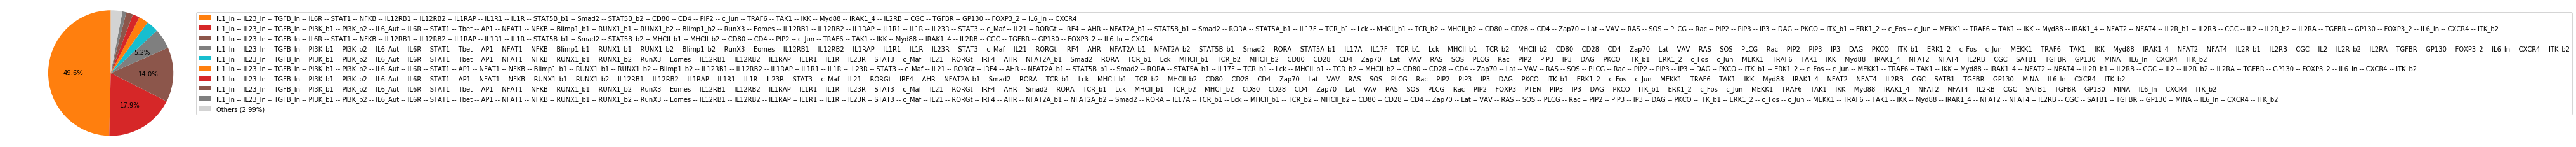

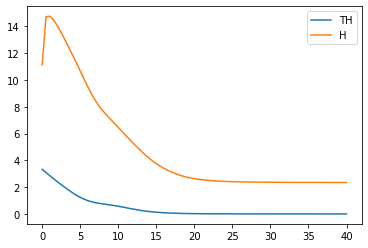

In [28]:
# Simulation of wild type
print("Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with Th17 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [29]:
   #Simulation of wildtype background starting from Th0 state with Th17 input condition considering some output components
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])
    
    
    # Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)

Simulation of wildtype background starting from Th0 state with Th17 input condition


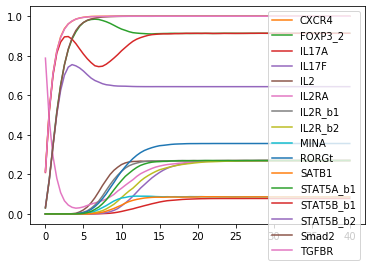

In [30]:
# Simulation of wild type
print("Simulation of wildtype background starting from Th0 state with Th17 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [48]:
#==========================
# IL12+IL1B INPUT CONDITION
#==========================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)

Piechart and entropy trjectory of wildtype background simulation starting from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.1219
H     3.5554
Name: 15.5, dtype: float64


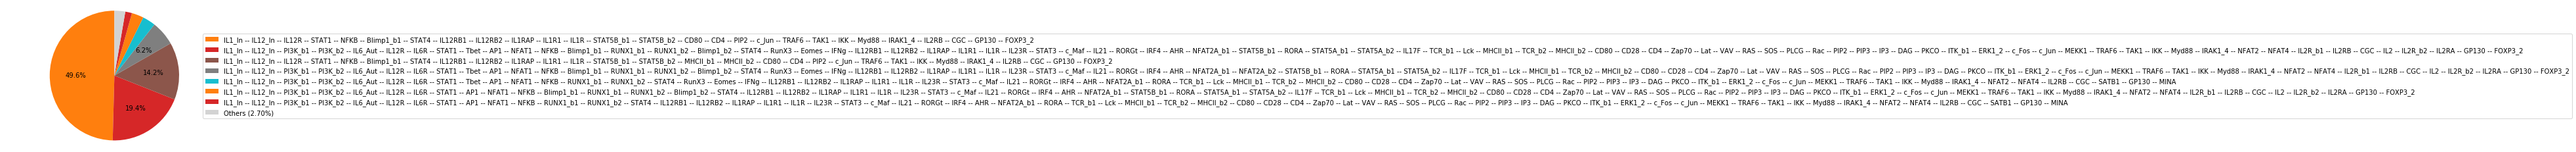

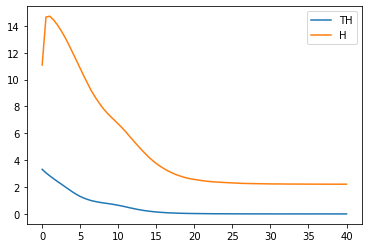

In [49]:
# Simulation of wild type
print("Piechart and entropy trjectory of wildtype background simulation starting from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [50]:
#Simulation of wildtype background starting from Th0 state with IL12+IL1B input condition considering some output components
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_node_trajectory(until=40)

Simulation of wildtype background starting from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.0702
H     2.3042
Name: 15.5, dtype: float64


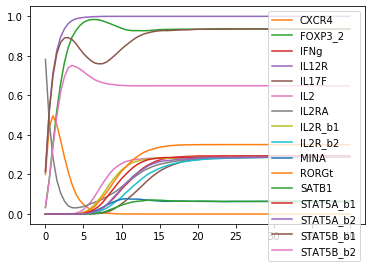

In [51]:
# Simulation of wild type
print("Simulation of wildtype background starting from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [56]:
#=============================
# NO CYTOKINES INPUT CONDITION
#=============================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and No cytokines input condition
# Per default, all nodes are set to zero at initial state

#   Nocytokines_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2",  CD4", "PIP2", "MHCII_b2", "CD80")
    Nocytokines_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Nocytokines_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Nocytokines_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    

Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with No cytokines input condition
Entropy (TH) :
TH    0.0069
H     2.2671
Name: 15.5, dtype: float64


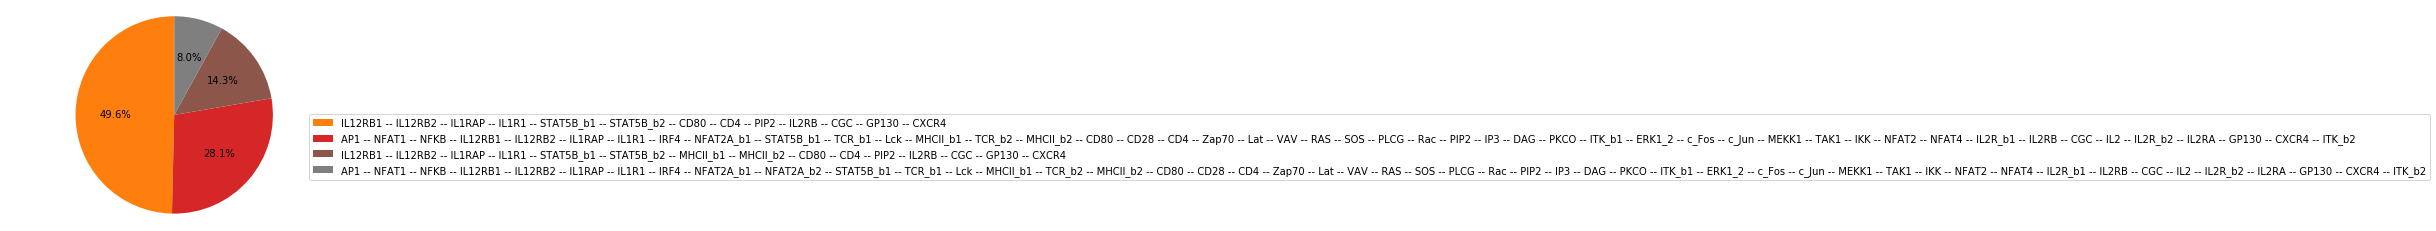

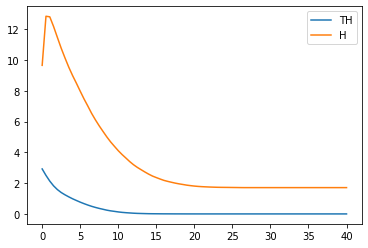

In [57]:
# Simulation of wild type
print("Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with No cytokines input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [58]:
##Simulation of wildtype background starting from Th0 state with No cytokines input condition considering some output components
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])

# Defining ON components at initial state, corresponding to Th0 and No cytokines input condition
# Per default, all nodes are set to zero at initial state

#   Nocytokines_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2",  CD4", "PIP2", "MHCII_b2", "CD80")
    Nocytokines_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Nocytokines_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Nocytokines_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_node_trajectory(until=40)

Simulation of wildtype background starting from Th0 state with No cytokines input condition
Entropy (TH) :
TH    0.0001
H     1.3622
Name: 15.5, dtype: float64


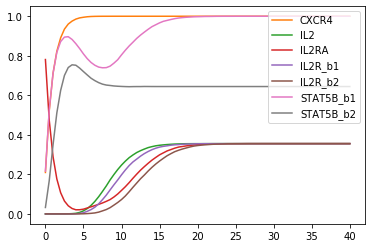

In [59]:
# Simulation of wild type
print("Simulation of wildtype background starting from Th0 state with No cytokines input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [60]:
#====================
# TH1 INPUT CONDITION
#====================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th1 input condition
# Per default, all nodes are set to zero at initial state

#   Th1_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th1_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th1_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th1_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)

Piechart and entropy of wildtype background simulation starting from Th0 state with Th1 input condition
Entropy (TH) :
TH    0.0477
H     2.6402
Name: 15.5, dtype: float64


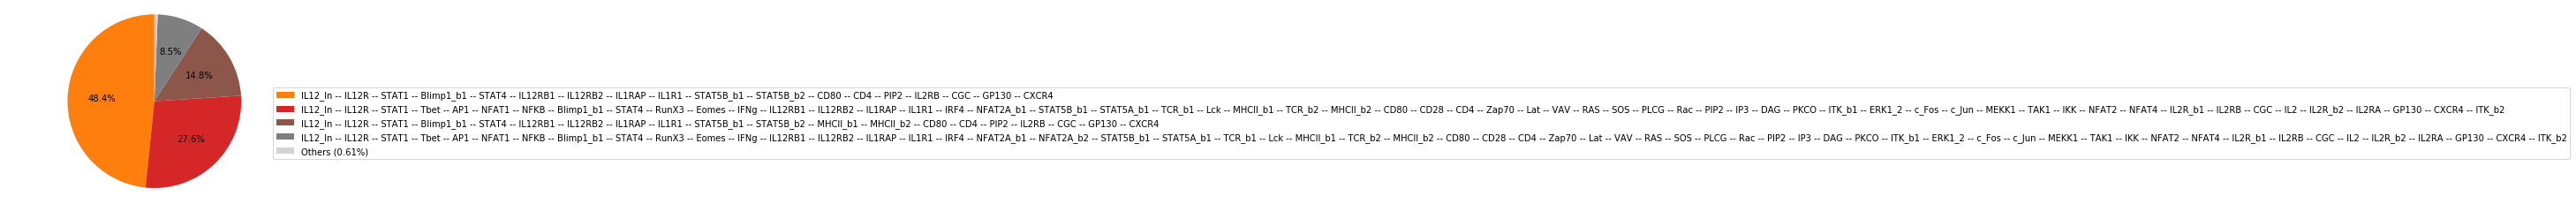

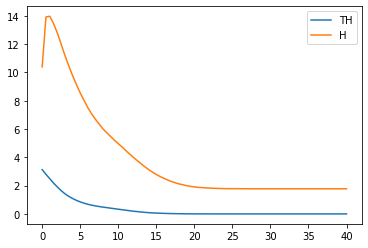

In [61]:
# Simulation of wild type
print("Piechart and entropy of wildtype background simulation starting from Th0 state with Th1 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [62]:
##Simulation of wildtype background starting from Th0 state with Th1 input condition considering some output components
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th1 input condition
# Per default, all nodes are set to zero at initial state

#   Th1_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th1_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th1_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th1_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_node_trajectory(until=40)
    

Simulation of wildtype background starting from Th0 state with Th1 input condition
Entropy (TH) :
TH    0.0173
H     1.5688
Name: 15.5, dtype: float64


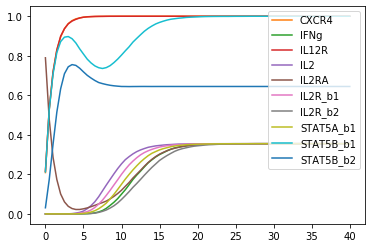

In [63]:
# Simulation of wild type
print("Simulation of wildtype background starting from Th0 state with Th1 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [64]:
#=====================
# IL1B INPUT CONDITION
#=====================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL1B_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)

Piechart and entropy trajectory of wildtype simulation background starting from Th0 state with IL1B input condition
Entropy (TH) :
TH    0.1125
H     3.5799
Name: 15.5, dtype: float64


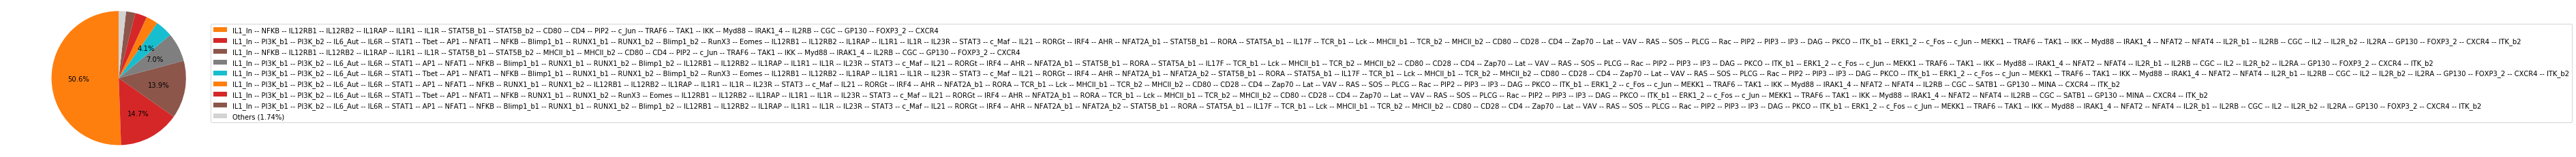

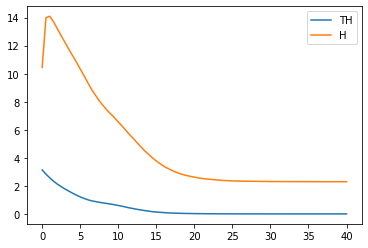

In [65]:
# Simulation of wild type
print("Piechart and entropy trajectory of wildtype simulation background starting from Th0 state with IL1B input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [66]:
##Simulation of wildtype background starting from Th0 state with IL1B input condition considering some output components
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL1B_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_node_trajectory(until=40)
    

Simulation of wildtype background starting from Th0 state with IL1B input condition
Entropy (TH) :
TH    0.0566
H     1.9819
Name: 15.5, dtype: float64


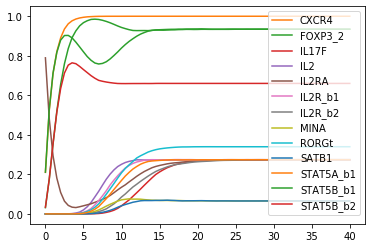

In [67]:
# Simulation of wild type
print("Simulation of wildtype background starting from Th0 state with IL1B input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [68]:
#=====================
# IL23 INPUT CONDITION
#=====================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL23 input condition
# Per default, all nodes are set to zero at initial state

#   IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL23_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL23_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)

Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with IL23 input condition
Entropy (TH) :
TH    0.0052
H     2.2495
Name: 15.5, dtype: float64


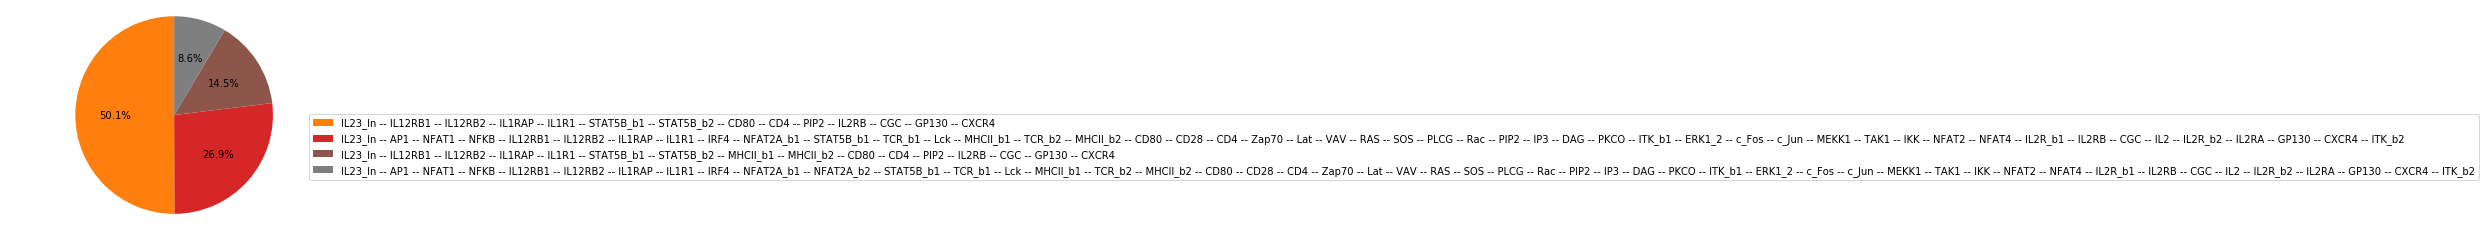

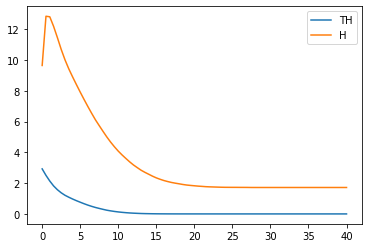

In [69]:
# Simulation of wild type
print("Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with IL23 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [70]:
##Simulation of wildtype background starting from Th0 state with IL23 input condition considering some output components
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL23 input condition
# Per default, all nodes are set to zero at initial state

#   IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL23_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL23_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_node_trajectory(until=40)
  

Simulation of wildtype background starting from Th0 state with IL23 input condition
Entropy (TH) :
TH    0.0001
H     1.3605
Name: 15.5, dtype: float64


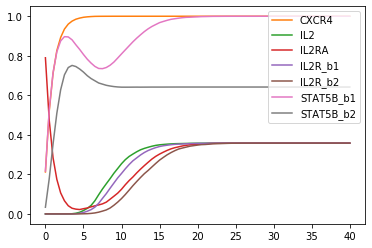

In [71]:
# Simulation of wild type
print("Simulation of wildtype background starting from Th0 state with IL23 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [72]:
#==========================
# IL1B+IL23 INPUT CONDITION
#==========================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL1B+IL23 input condition
# Per default, all nodes are set to zero at initial state

#   IL1B_IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In", IL1_In",  CD4", "PIP2", "MHCII_b2", "CD80")
    IL1B_IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In","IL1_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL1B_IL23_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL1B_IL23_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)

Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with IL1B+IL23 input condition
Entropy (TH) :
TH    0.1070
H     3.5599
Name: 15.5, dtype: float64


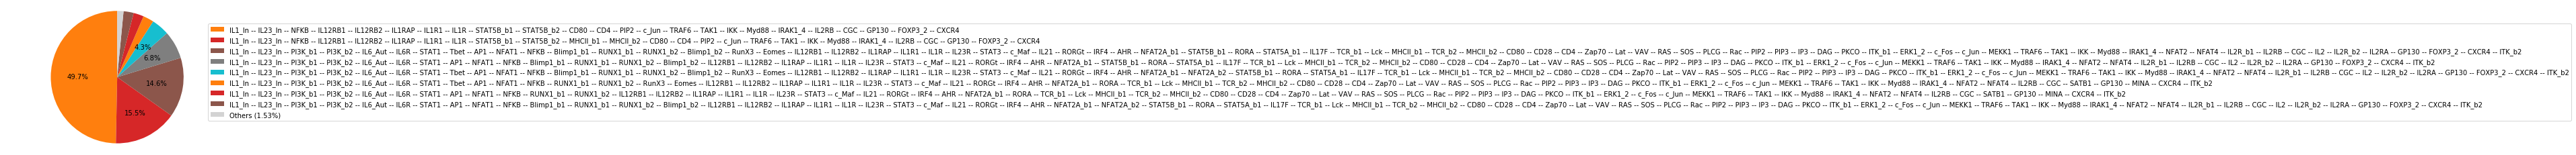

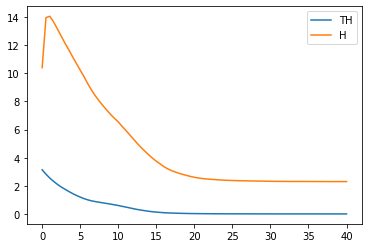

In [73]:
# Simulation of wild type
print("Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with IL1B+IL23 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [6]:
##Simulation of wildtype background starting from Th0 state with IL1B+IL23 input condition considering some output components
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL1B+IL23 input condition
# Per default, all nodes are set to zero at initial state

#   IL1B_IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In", IL1_In",  CD4", "PIP2", "MHCII_b2", "CD80")
    IL1B_IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In","IL1_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL1B_IL23_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL1B_IL23_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_node_trajectory(until=40)


Simulation of wildtype background starting from Th0 state with IL1B+IL23 input condition
Entropy (TH) :
TH    0.0594
H     2.0474
Name: 15.5, dtype: float64


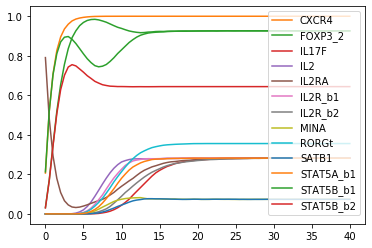

In [7]:
# Simulation of wild type
print("Simulation of wildtype background starting from Th0 state with IL1B+IL23 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [76]:
#===============================
# IL12+IL1B+IL23 INPUT CONDITION
#===============================

#Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B+IL23 input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In", "IL1_In", "IL12_In", CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In","IL1_In", "IL12_In","CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_IL1B_IL23_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_IL23_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)

Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with IL12+IL1B+IL23 input condition
Entropy (TH) :
TH    0.1281
H     3.6190
Name: 15.5, dtype: float64


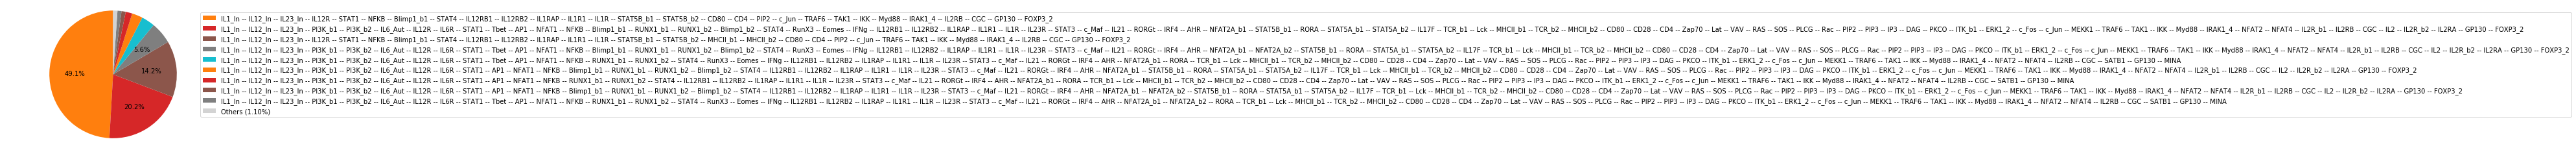

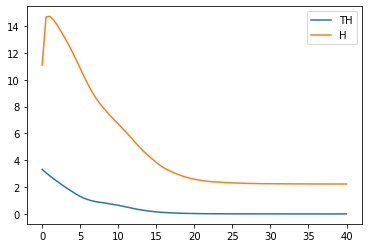

In [77]:
# Simulation of wild type
print("Piechart and entropy trajectory of wildtype background simulation starting from Th0 state with IL12+IL1B+IL23 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

In [78]:
##Simulation of wildtype background starting from Th0 state with IL12+IL1B+IL23 input condition considering some output components
#Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B+IL23 input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In", "IL1_In", "IL12_In", CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_IL23_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL23_In","IL1_In", "IL12_In","CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_IL1B_IL23_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_IL23_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_node_trajectory(until=40)
    

Simulation of wildtype background starting from Th0 state with IL12+IL1B+IL23 input condition
Entropy (TH) :
TH    0.0663
H     2.2950
Name: 15.5, dtype: float64


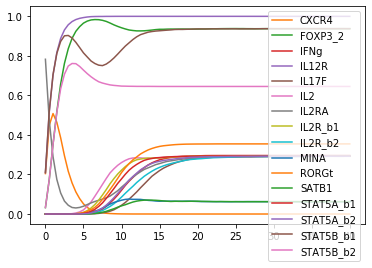

In [79]:
# Simulation of wild type
print("Simulation of wildtype background starting from Th0 state with IL12+IL1B+IL23 input condition")
maboss_simulation(lqm)
# This may take  a few minutes on a personal computer

### 2.2 - Simulation of mutants in distinct input conditions of interest

#### Simulation of mutants in IL12+IL1B condition

Simulation of Smad2 gain-of-function from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.1157
H     3.6252
Name: 15.5, dtype: float64


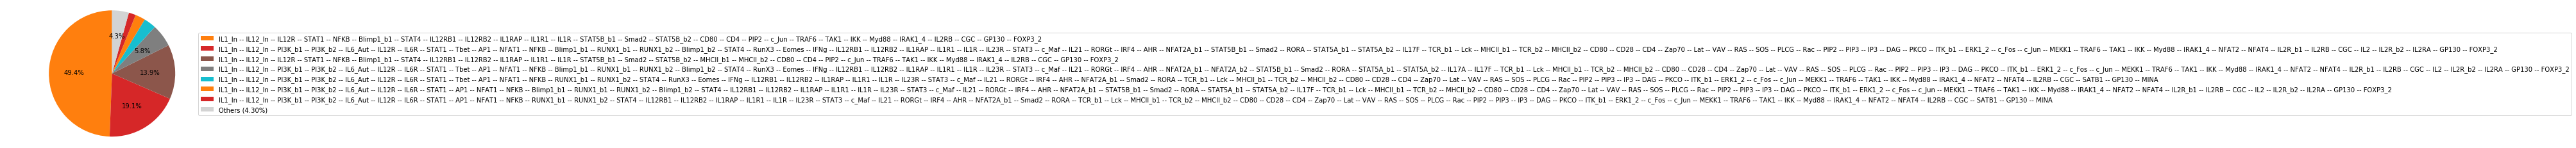

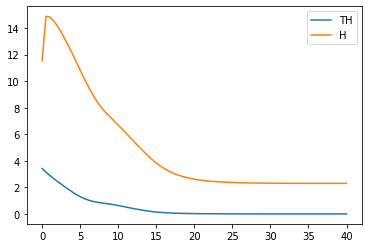

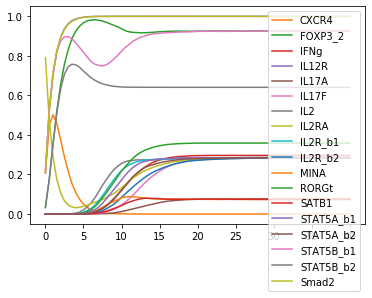

In [87]:
#======================================
# SIMULATION OF SMAD2 GAIN-OF-FUNCTION
#======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
    #simulation of Smad2_3 gain-of-function
print("Simulation of Smad2 gain-of-function from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_Smad_1)
    
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
    #simulation of Smad2_3 gain-of-function
maboss_simulation(lqm_Smad_1)
    

Simulation of Smad2 knock down from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.1217
H     3.5155
Name: 15.5, dtype: float64


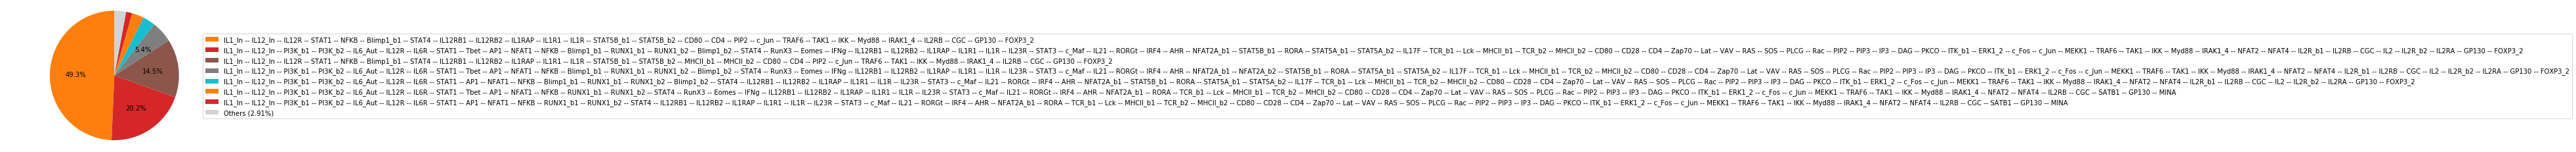

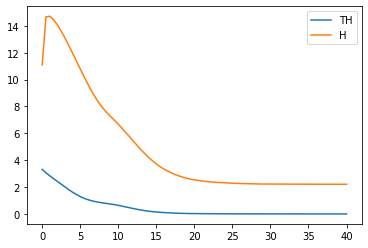

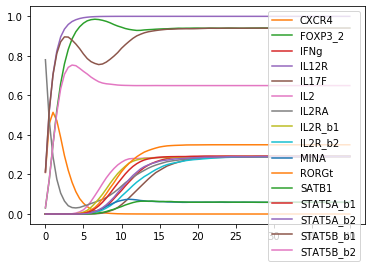

In [88]:
#======================================
# SIMULATION OF SMAD2 LOSS-OF-FUNCTION
#======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
    #simulation of Smad2 loss-of-function
print("Simulation of Smad2 knock down from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_Smad_0)
    
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
    #simulation of Smad2 loss-of-function
maboss_simulation(lqm_Smad_0)

Simulation of NFAT2A gain-of-function, level 2, from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.1122
H     3.3002
Name: 15.5, dtype: float64


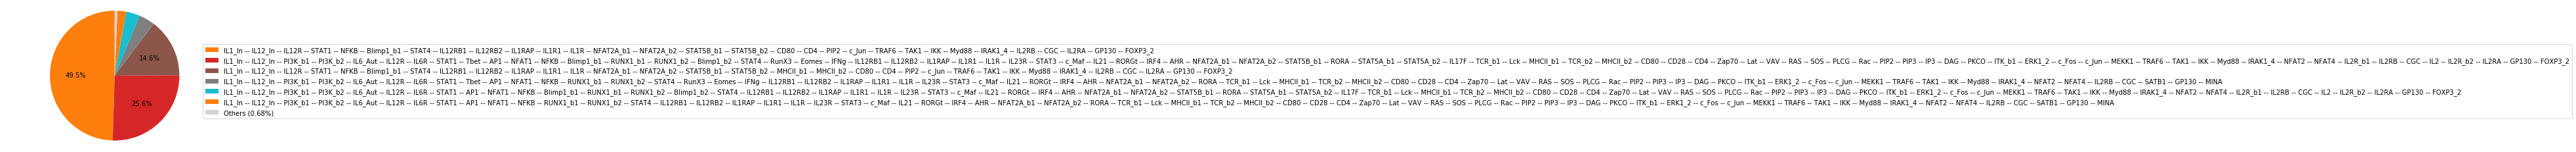

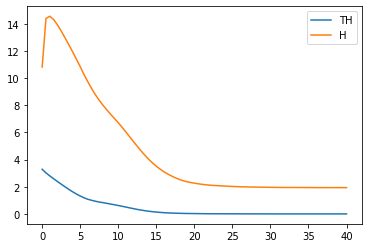

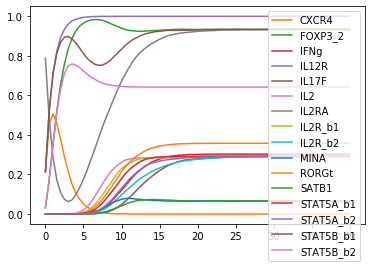

In [89]:
#======================================
# SIMULATION OF NFAT2A GAIN-OF-FUNCTION
#======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
    #simulation of NFAT2A gain-of-function
print("Simulation of NFAT2A gain-of-function, level 2, from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_NFAT2A_2)
    
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
     #simulation of NFAT2A gain-of-function
maboss_simulation(lqm_NFAT2A_2)

Simulation of NFAT2A knock down from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.0999
H     3.1639
Name: 15.5, dtype: float64


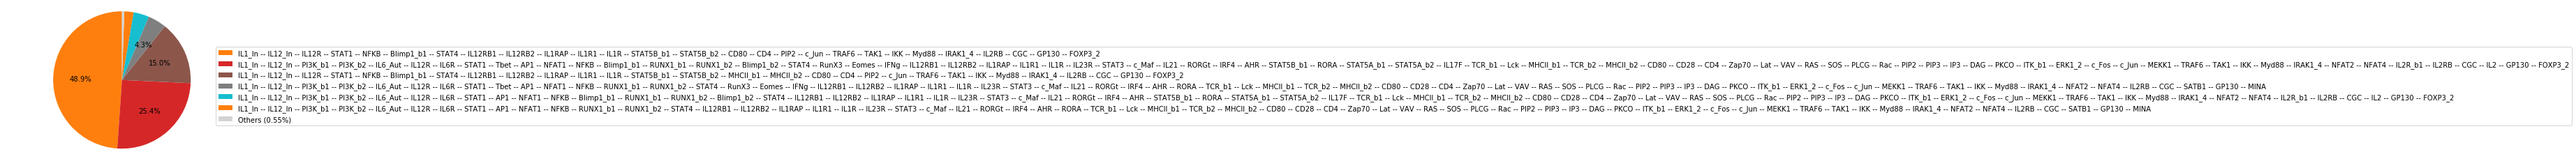

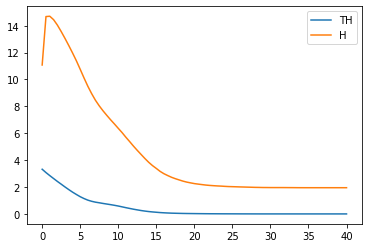

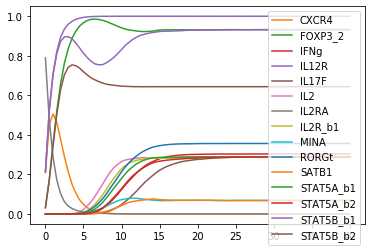

In [90]:
#======================================
# SIMULATION OF NFAT2A LOSS-OF-FUNCTION
#======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
    #simulation of NFAT2A loss-of-function
print("Simulation of NFAT2A knock down from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_NFAT2A_0)
    
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
     #simulation of NFAT2A loss-of-function
maboss_simulation(lqm_NFAT2A_0)

Simulation of STAT5A gain-of-function, level 1, from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.0618
H     3.0247
Name: 15.5, dtype: float64


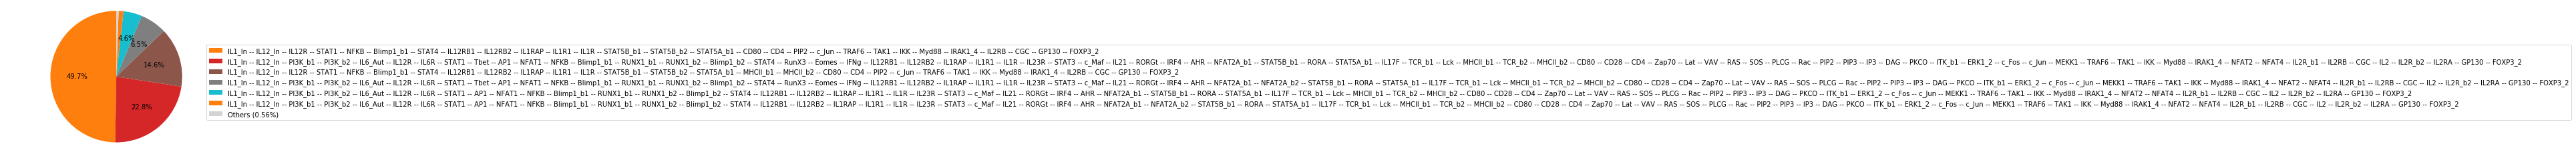

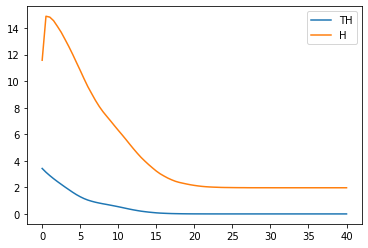

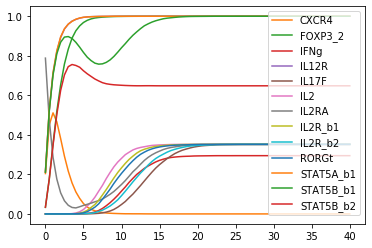

In [91]:
#======================================
# SIMULATION OF STAT5A GAIN-OF-FUNCTION
#======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of the STAT5A intermediate level effect
print("Simulation of STAT5A gain-of-function, level 1, from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_STAT5A_1)
    
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
     #simulation of the STAT5A intermediate level effect
maboss_simulation(lqm_STAT5A_1)

Simulation of STAT5A loss-of-function from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.1551
H     3.9670
Name: 15.5, dtype: float64


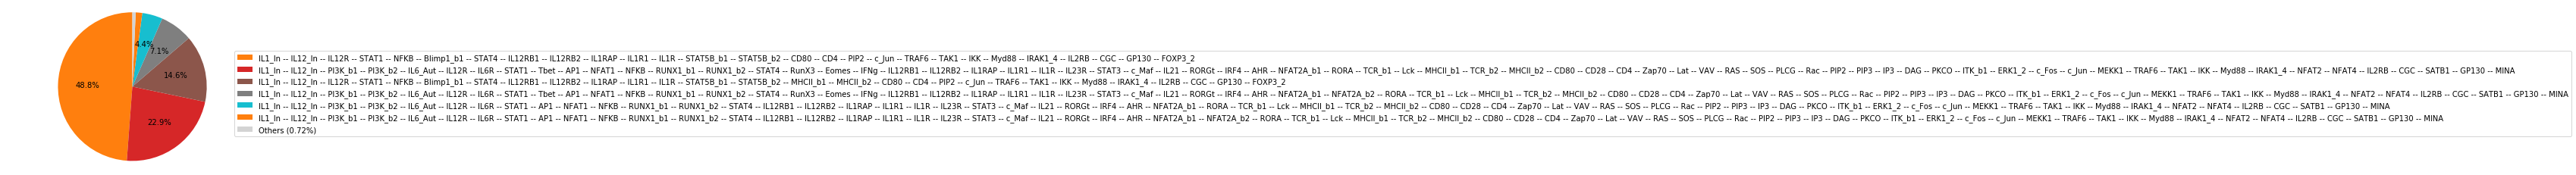

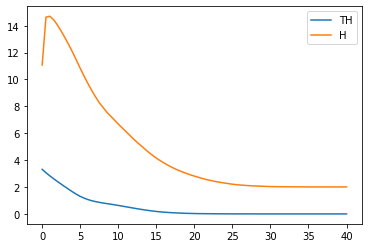

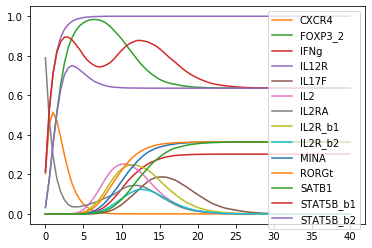

In [92]:
#======================================
# SIMULATION OF STAT5A LOSS-OF-FUNCTION
#======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of STAT5A loss-of-function
print("Simulation of STAT5A loss-of-function from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_STAT5A_0)
    
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
      #simulation of STAT5A loss-of-function
maboss_simulation(lqm_STAT5A_0)

Simulation of the ectopic expression of Smad2 and NFAT2A at level 2  from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.1261
H     3.5695
Name: 15.5, dtype: float64


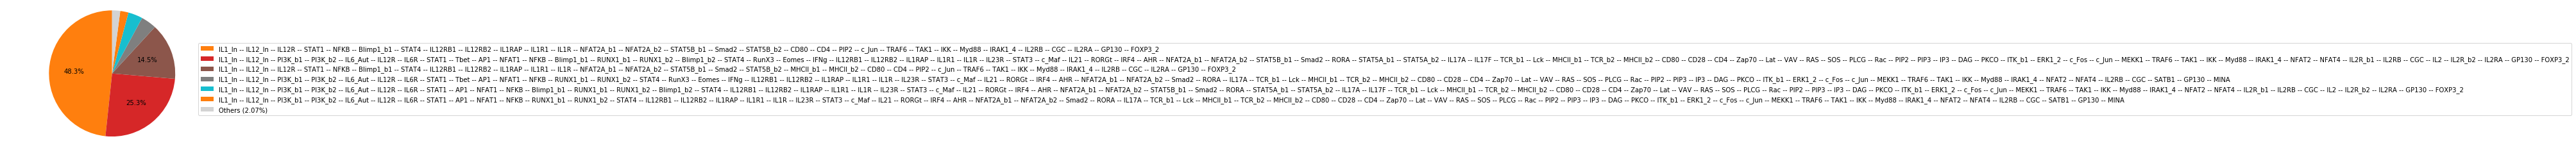

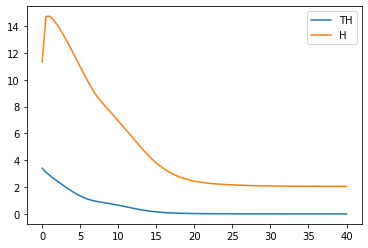

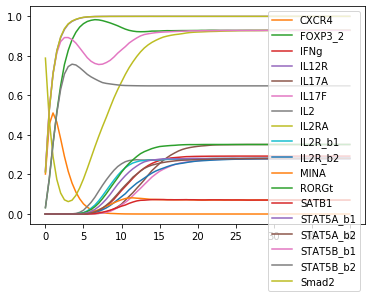

In [93]:
#============================================================================
# SIMULATION OF SMAD2 GAIN-OF-FUNCTION AND NFAT2A GAIN-OF-FUNCTION AT LEVEL 2
#============================================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of the ectopic expression of Smad2 and NFAT2A at level 2
print("Simulation of the ectopic expression of Smad2 and NFAT2A at level 2  from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_Smad_1_NFAT2A_2)
    
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
       #simulation of the ectopic expression of Smad2 and NFAT2A at level 2
maboss_simulation(lqm_Smad_1_NFAT2A_2)

Simulation of the ectopic expression of Smad2 and STAT5A at level 1  from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.0670
H     3.2235
Name: 15.5, dtype: float64


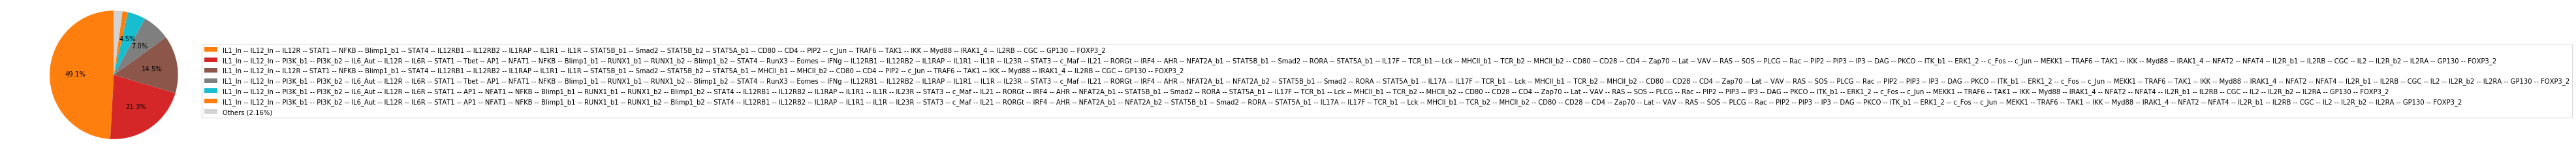

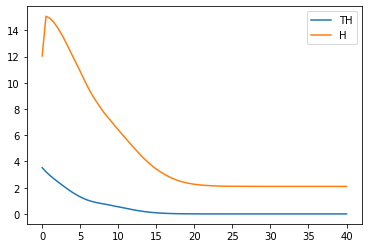

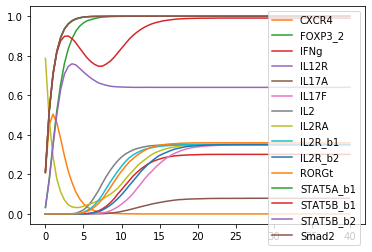

In [94]:
#============================================================================
# SIMULATION OF SMAD2 GAIN-OF-FUNCTION AND STAT5A GAIN-OF-FUNCTION AT LEVEL 1
#============================================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
  #simulation of the ectopic expression of Smad2 and STAT5A at level 1
print("Simulation of the ectopic expression of Smad2 and STAT5A at level 1  from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_Smad_1_STAT5A_1)
    
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
       #simulation of the ectopic expression of Smad2 and STAT5A at level 1
maboss_simulation(lqm_Smad_1_STAT5A_1)

Simulation of the ectopic expression of Smad2 and STAT5A at level 0  from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.1540
H     4.0094
Name: 15.5, dtype: float64


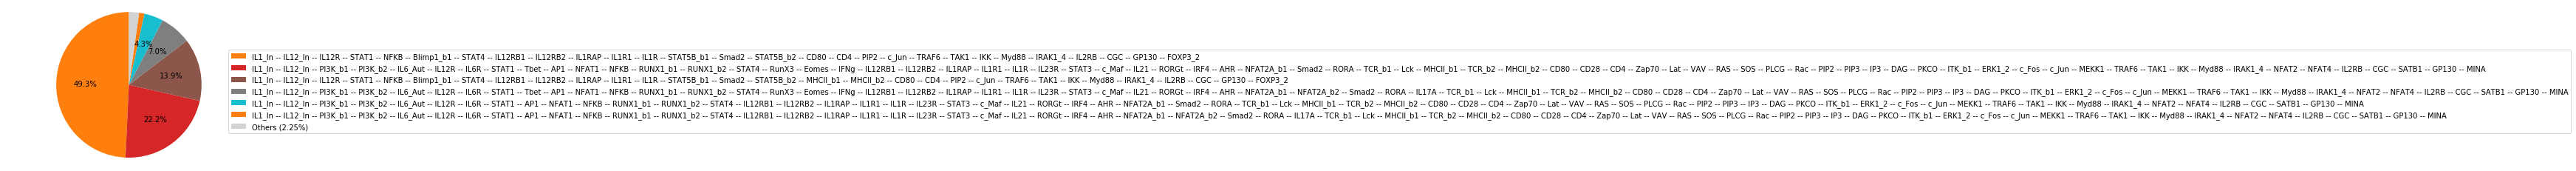

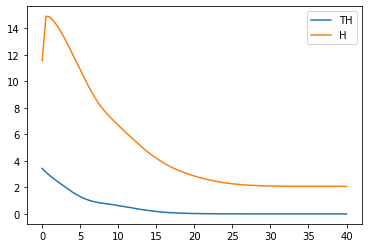

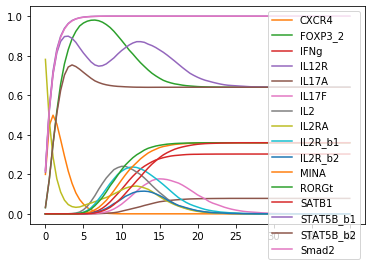

In [95]:
#====================================================================
# SIMULATION OF SMAD2 GAIN-OF-FUNCTION AND STAT5A LOSS-OF-FUNCTION
#====================================================================

Simulation of the ectopic expression of Smad2 and STAT5A at level 0

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
  #simulation of the ectopic expression of Smad2 and STAT5A at level 0
print("Simulation of the ectopic expression of Smad2 and STAT5A at level 0  from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_Smad_1_STAT5A_0)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
       #simulation of the ectopic expression of Smad2 and STAT5A at level 0
maboss_simulation(lqm_Smad_1_STAT5A_0)

Simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 1  from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.0626
H     2.8648
Name: 15.5, dtype: float64


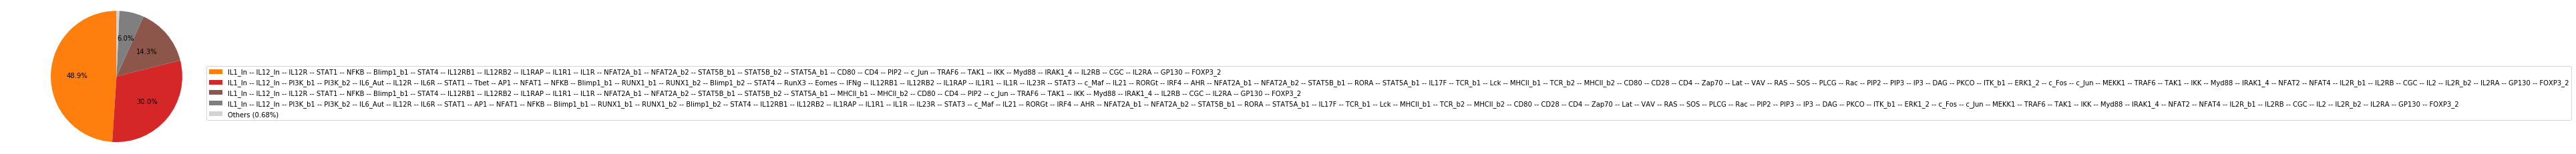

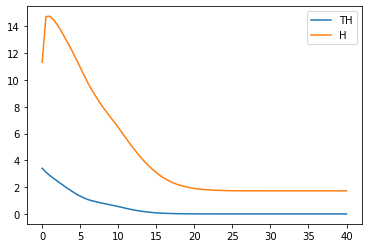

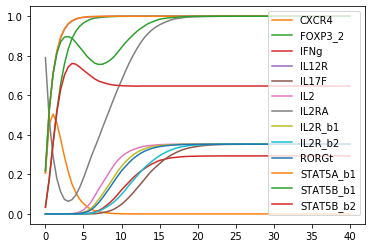

In [96]:
#========================================================================================
# SIMULATION OF NFAT2A GAIN-OF-FUNCTION AT LEVEL 2 AND STAT5A GAIN-OF-FUNCTION AT LEVEL 1 
#========================================================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
  #simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 1
print("Simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 1  from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_NFAT2A_2_STAT5A_1)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
       #simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 1
maboss_simulation(lqm_NFAT2A_2_STAT5A_1)

Simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 0  from Th0 state with IL12+IL1B input condition
Entropy (TH) :
TH    0.1525
H     3.7159
Name: 15.5, dtype: float64


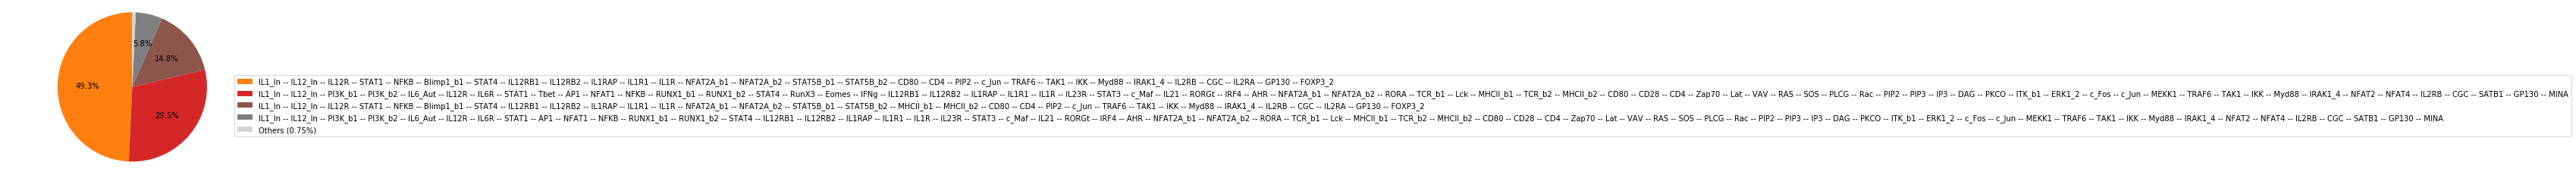

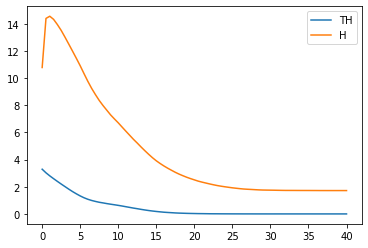

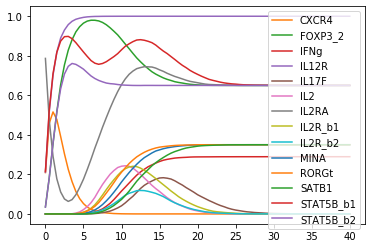

In [97]:
#=============================================================================
# SIMULATION OF NFAT2A GAIN-OF-FUNCTION AT LEVEL 2 AND STAT5A LOSS_OF_FUNCTION
#=============================================================================
    
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
  #simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 0
print("Simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 0  from Th0 state with IL12+IL1B input condition")
maboss_simulation(lqm_NFAT2A_2_STAT5A_0)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL12_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, IL12_ILB_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
       #simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 0
maboss_simulation(lqm_NFAT2A_2_STAT5A_0)

#### Simulations of mutants in Th17 input condition

Simulation of Smad2 gain-of-function from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.1062
H     3.6564
Name: 15.5, dtype: float64


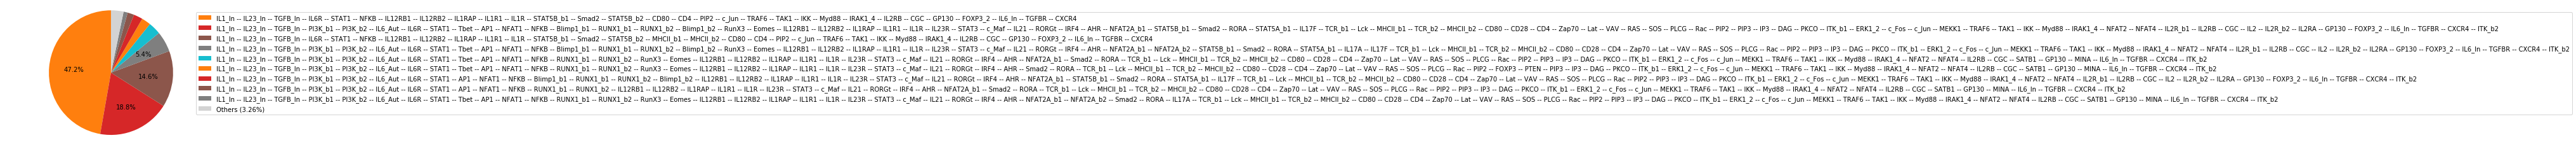

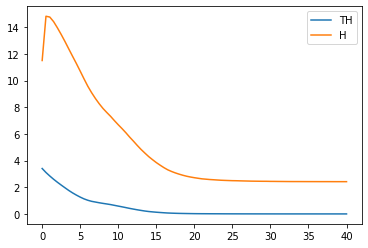

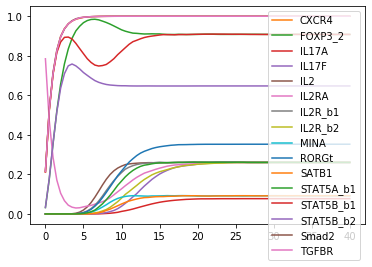

In [111]:
#=======================================
# SIMULATION OF SMAD2_3 GAIN-OF-FUNCTION
#=======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
    #simulation of Smad2 gain-of-function
print("Simulation of Smad2 gain-of-function from Th0 state with Th17 input condition")
maboss_simulation(lqm_Smad_1)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
    #simulation of Smad2_3 gain-of-function
maboss_simulation(lqm_Smad_1)

Simulation of Smad2 loss-of-function from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.1039
H     3.4304
Name: 15.5, dtype: float64


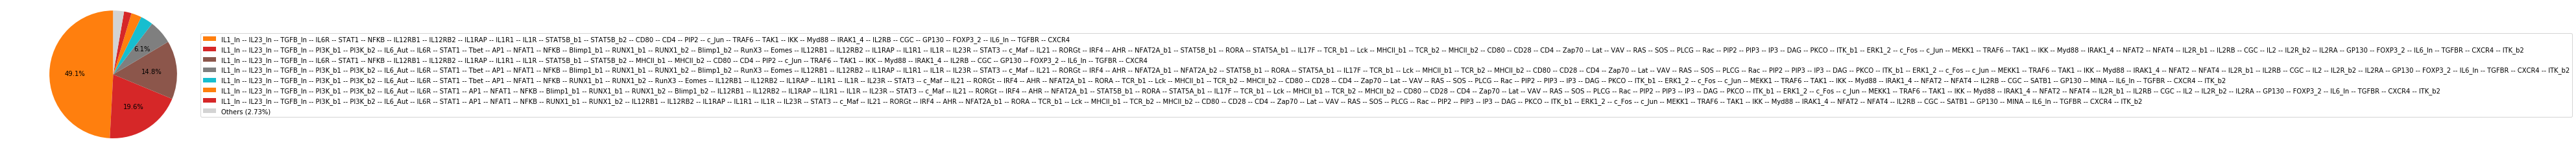

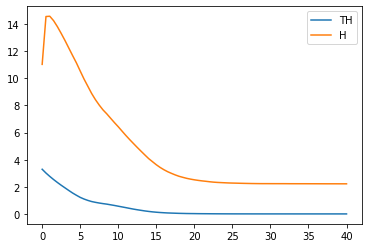

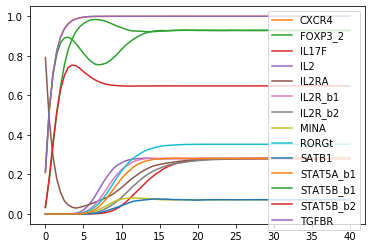

In [112]:
#=======================================
# SIMULATION OF SMAD2_3 LOSS-OF-FUNCTION
#=======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of Smad2 loss-of-function
print("Simulation of Smad2 loss-of-function from Th0 state with Th17 input condition")
maboss_simulation(lqm_Smad_0)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
    #simulation of Smad2_3 loss-of-function
maboss_simulation(lqm_Smad_0)

Simulation of NFAT2A gain-of-function, level 2, from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.1135
H     3.5350
Name: 15.5, dtype: float64


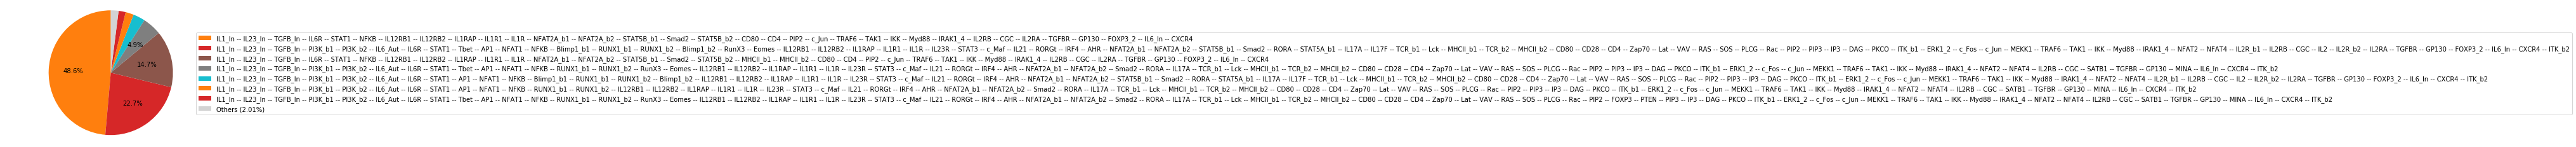

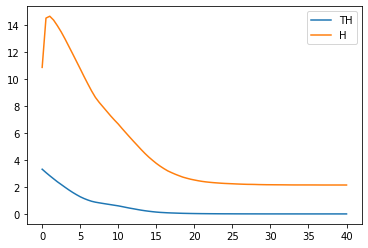

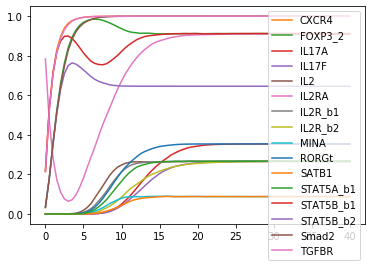

In [100]:
#=======================================
# SIMULATION OF NFAT2A GAIN-OF-FUNCTION
#=======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of NFAT2A gain-of-function
print("Simulation of NFAT2A gain-of-function, level 2, from Th0 state with Th17 input condition")
maboss_simulation(lqm_NFAT2A_2)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of NFAT2A gain-of-function
maboss_simulation(lqm_NFAT2A_2)

Simulation of NFAT2A loss-of-function, from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.0912
H     3.2669
Name: 15.5, dtype: float64


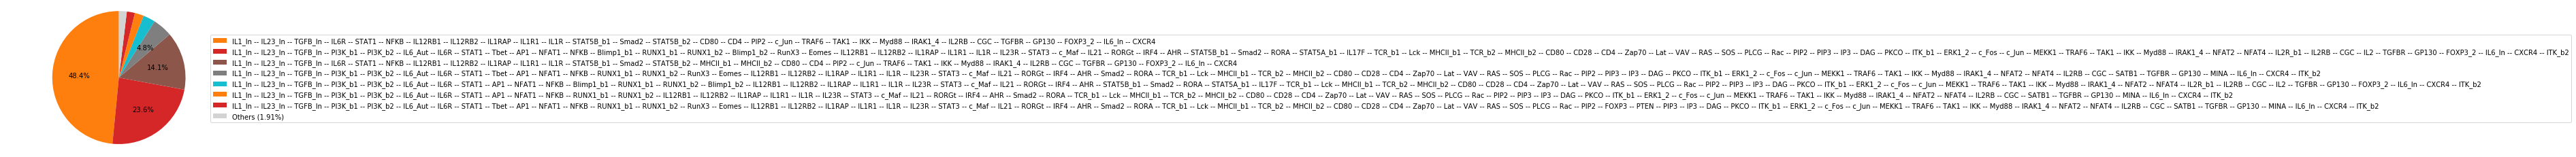

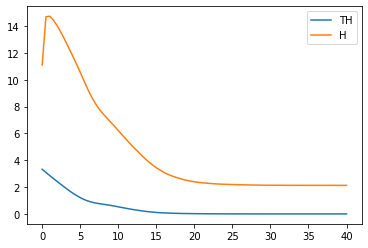

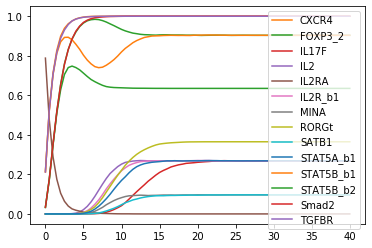

In [101]:
#=======================================
# SIMULATION OF NFAT2A LOSS-OF-FUNCTION
#=======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of NFAT2A loss-of-function
print("Simulation of NFAT2A loss-of-function, from Th0 state with Th17 input condition")
maboss_simulation(lqm_NFAT2A_0)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of NFAT2A loss-of-function
maboss_simulation(lqm_NFAT2A_0)

Simulation of STAT5A gain-of-function, level 1, from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.0590
H     3.1592
Name: 15.5, dtype: float64


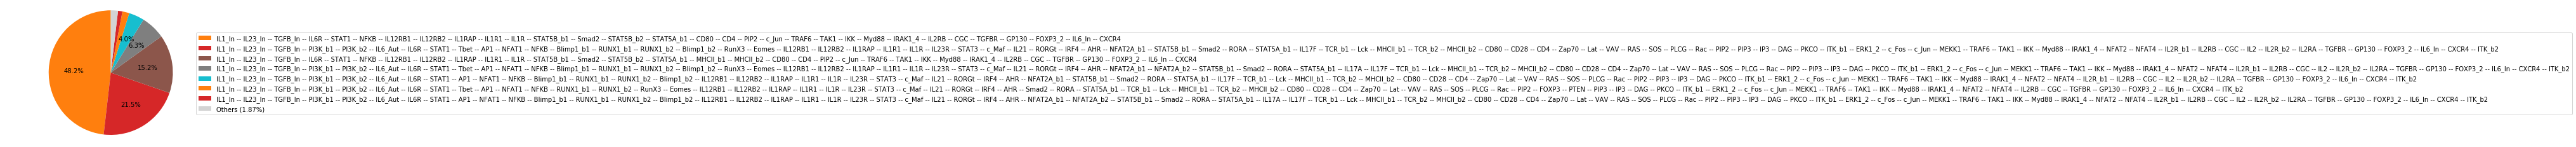

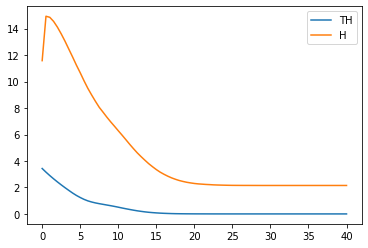

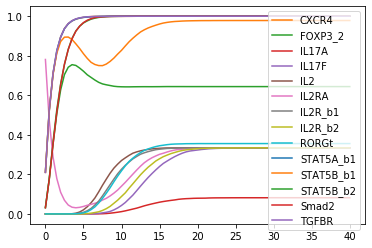

In [102]:
#=================================================
# SIMULATION OF STAT5A GAIN-OF-FUNCTION AT LEVEL 1
#=================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of the STAT5A intermediate level effect
print("Simulation of STAT5A gain-of-function, level 1, from Th0 state with Th17 input condition")
maboss_simulation(lqm_STAT5A_1)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of the STAT5A intermediate level effect
maboss_simulation(lqm_STAT5A_1)

Simulation of STAT5A loss-of-function from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.1472
H     3.9816
Name: 15.5, dtype: float64


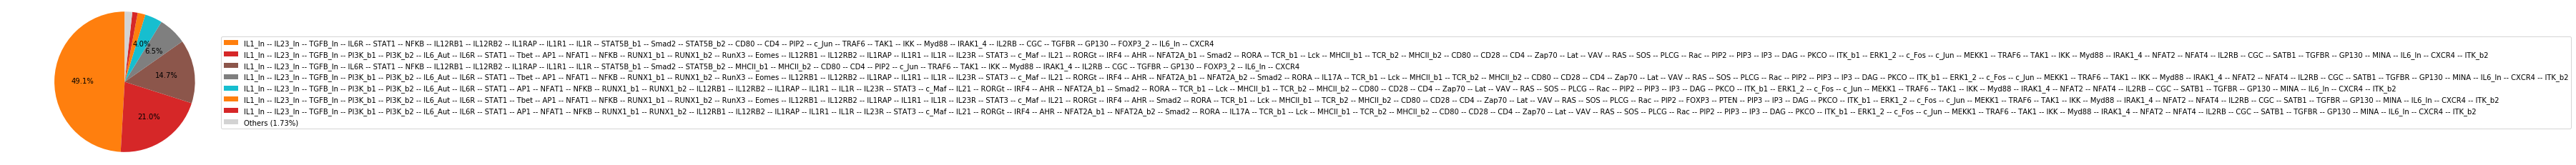

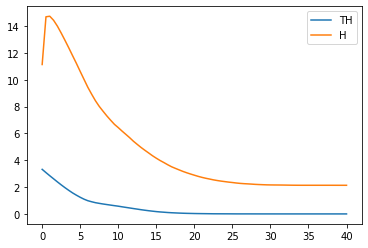

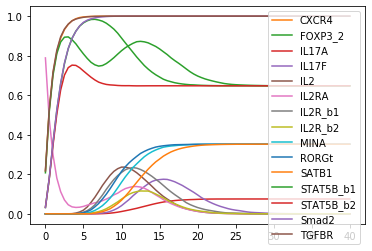

In [103]:
#=======================================
# SIMULATION OF STAT5A LOSS-OF-FUNCTION
#=======================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of STAT5A loss-of-function
print("Simulation of STAT5A loss-of-function from Th0 state with Th17 input condition")
maboss_simulation(lqm_STAT5A_0)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of STAT5A loss-of-function
maboss_simulation(lqm_STAT5A_0)

Simulation of the ectopic expression of Smad2 and NFAT2A at level 2  from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.1192
H     3.5655
Name: 15.5, dtype: float64


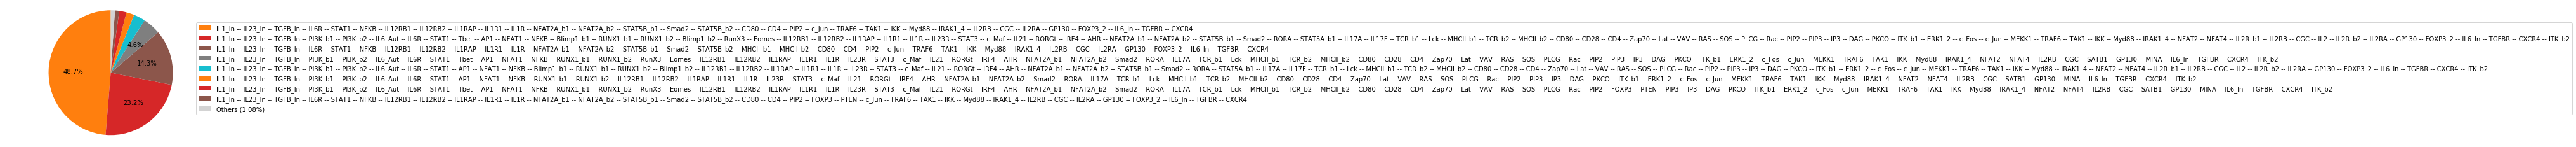

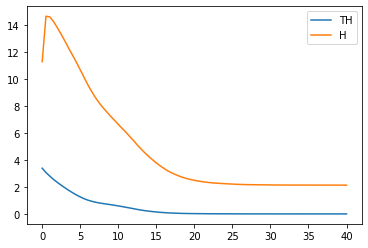

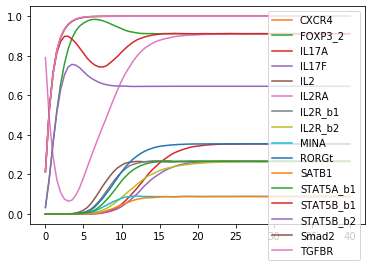

In [104]:
#============================================================================
# SIMULATION OF SMAD2 GAIN-OF-FUNCTION AND NFAT2A GAIN-OF-FUNCTION AT LEVEL 2
#============================================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of the ectopic expression of Smad2 and NFAT2A at level 2
print("Simulation of the ectopic expression of Smad2 and NFAT2A at level 2  from Th0 state with Th17 input condition")
maboss_simulation(lqm_Smad_1_NFAT2A_2)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of the ectopic expression of Smad2 and NFAT2A at level 2
maboss_simulation(lqm_Smad_1_NFAT2A_2)

Simulation of the ectopic expression of Smad2_3 and STAT5A at level 1  from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.0599
H     3.2025
Name: 15.5, dtype: float64


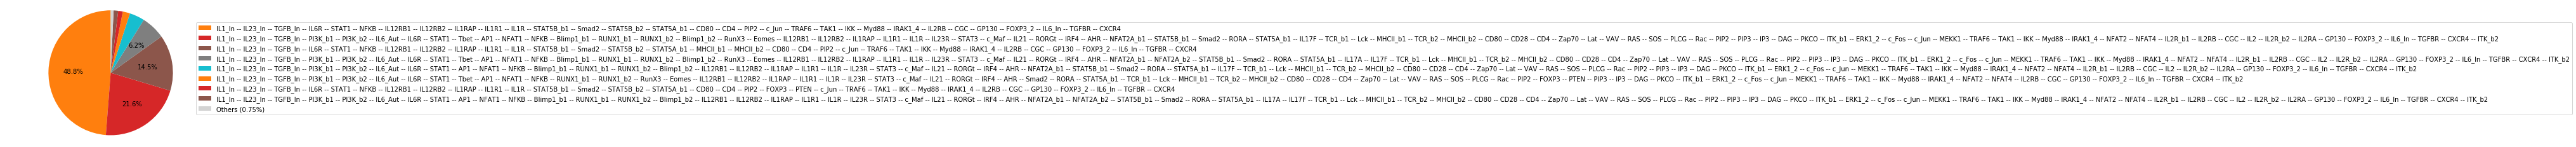

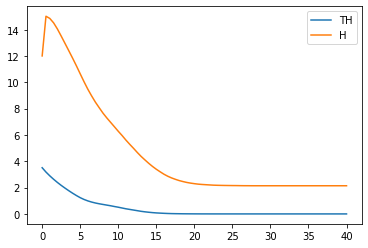

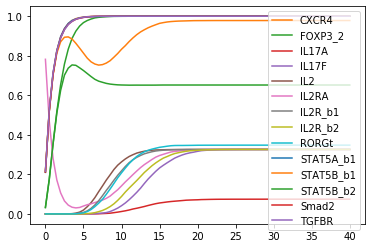

In [105]:
#============================================================================
# SIMULATION OF SMAD2 GAIN-OF-FUNCTION AND STAT5A GAIN-OF-FUNCTION AT LEVEL 1
#============================================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of the ectopic expression of Smad2 and STAT5A at level 1
print("Simulation of the ectopic expression of Smad2_3 and STAT5A at level 1  from Th0 state with Th17 input condition")
maboss_simulation(lqm_Smad_1_STAT5A_1)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of the ectopic expression of Smad2 and STAT5A at level 1
maboss_simulation(lqm_Smad_1_STAT5A_1)

Simulation of the ectopic expression of Smad2 and STAT5A at level 0  from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.1468
H     3.9769
Name: 15.5, dtype: float64


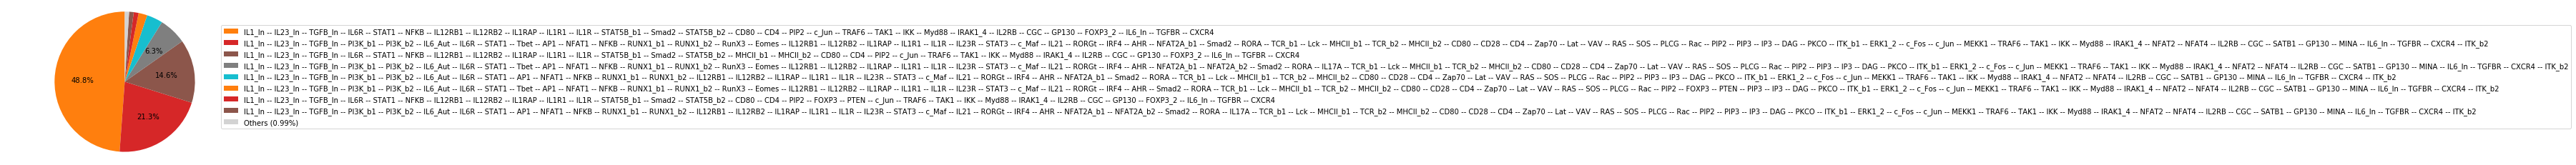

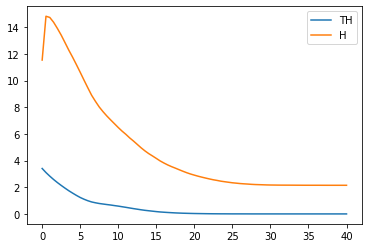

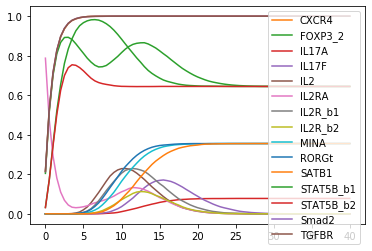

In [106]:
#=================================================================
# SIMULATION OF SMAD2 GAIN-OF-FUNCTION AND STAT5A LOSS-OF-FUNCTION
#=================================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of the ectopic expression of Smad2 and STAT5A at level 0
print("Simulation of the ectopic expression of Smad2 and STAT5A at level 0  from Th0 state with Th17 input condition")
maboss_simulation(lqm_Smad_1_STAT5A_0)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of the ectopic expression of Smad2 and STAT5A at level 0
maboss_simulation(lqm_Smad_1_STAT5A_0)

Simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 1  from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.0678
H     3.0368
Name: 15.5, dtype: float64


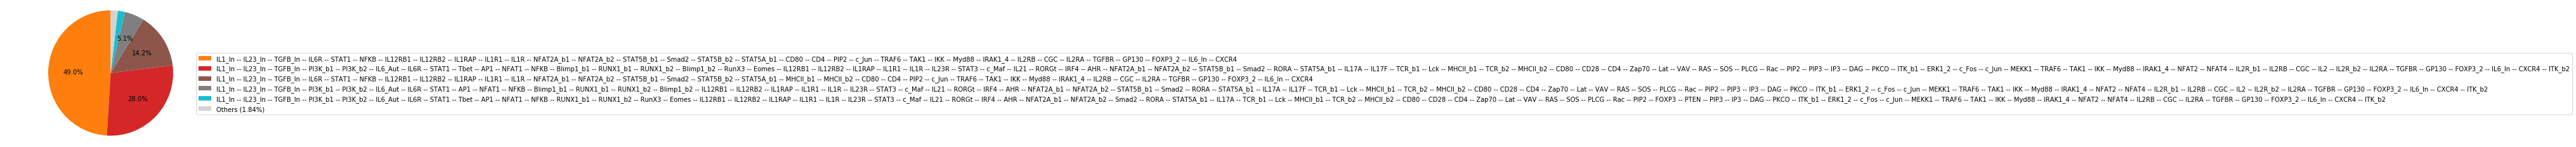

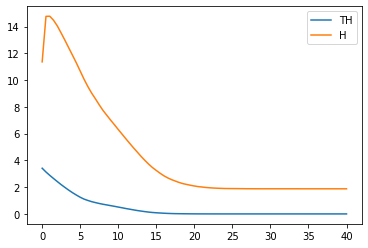

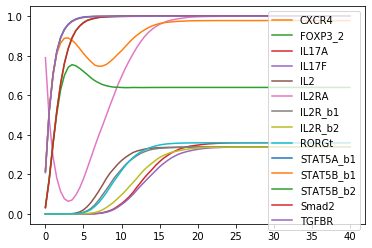

In [107]:
#========================================================================================
# SIMULATION OF NFAT2A GAIN-OF-FUNCTION AT LEVEL 2 AND STAT5A GAIN-OF-FUNCTION AT LEVEL 1
#========================================================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 1
print("Simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 1  from Th0 state with Th17 input condition")
maboss_simulation(lqm_NFAT2A_2_STAT5A_1)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 1
maboss_simulation(lqm_NFAT2A_2_STAT5A_1)

Simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 0  from Th0 state with Th17 input condition
Entropy (TH) :
TH    0.1621
H     3.8993
Name: 15.5, dtype: float64


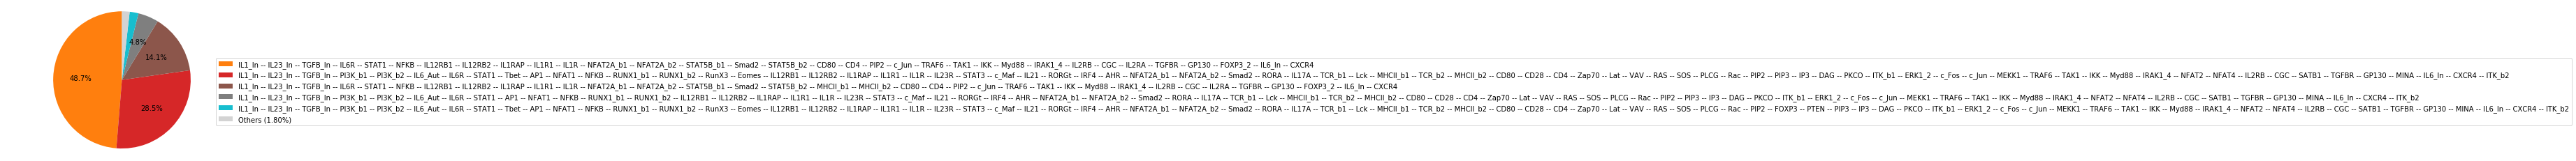

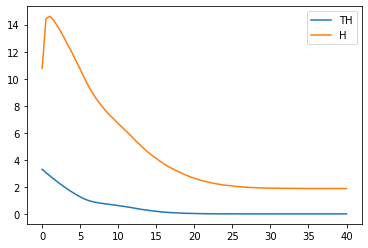

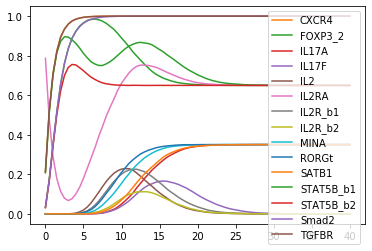

In [108]:
#=============================================================================
# SIMULATION OF NFAT2A GAIN-OF-FUNCTION AT LEVEL 2 AND STAT5A LOSS-OF-FUNCTION
#=============================================================================

# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
   #simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 0
print("Simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 0  from Th0 state with Th17 input condition")
maboss_simulation(lqm_NFAT2A_2_STAT5A_0)
    
    # Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to Th0 and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL2RA", "IL2RB", "CGC" , "TCR_b2", "Lck", "NFAT2A_b2", "IL1_In", "IL6_In", "IL23_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  NB: we need Lck and NFAT2A ON at initial state to enable T cell comittment
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
   #simulation of the ectopic expression of NFAT2A level 2 and STAT5A at level 0
maboss_simulation(lqm_NFAT2A_2_STAT5A_0)

### 2.3 - Simulations of re-stimulation experiments in distinct condition of interest

#### Simulation of re-stimulation of IL-12+IL1B polarized cells with Th17 input condition

Simulation of re-stimulation starting from IL12+IL1B polarized cells with Th17 input condition
Entropy (TH) :
TH    0.0000
H     0.0039
Name: 15.5, dtype: float64


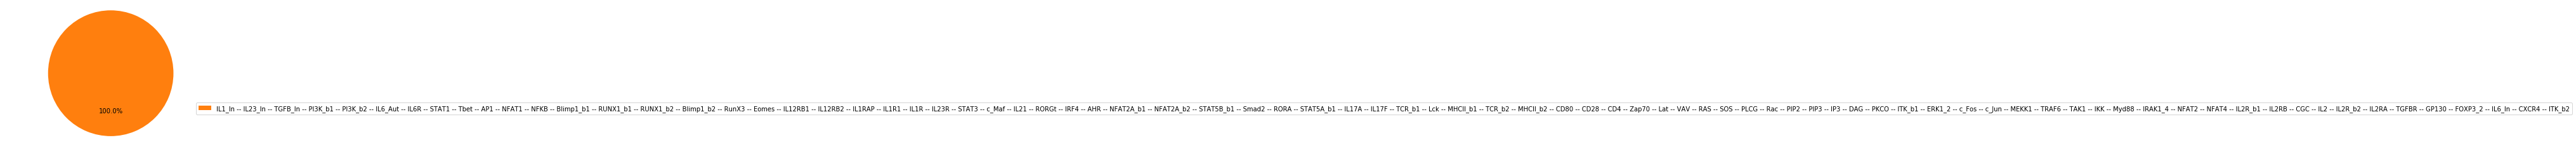

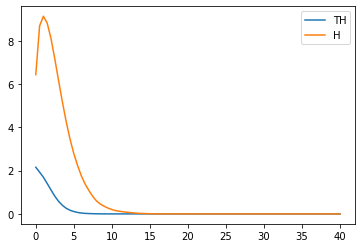

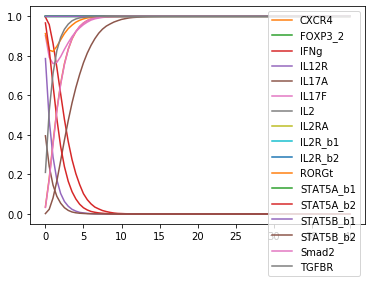

In [113]:
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to IFNg+IL-17F+ phenotype and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("PI3K_b1", "PI3K_b2", "IL6_Aut", "IL12R", "IL6R", "STAT1", "Tbet", "AP1", "NFAT1", "NFKB", "Blimp1_b1", "RUNX1_b2", "Blimp1_b2", "STAT4", "RunX3", "Eomes", "IFNg", "IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL1R", "IL23R", "STAT3", "c_Maf", "IL21", "RORGt", "IRF4", "AHR", "NFAT2A_b1", "NFAT2A_b2", "STAT5B_b1", "RORA", "STAT5A_b1", "STAT5A_b2", "IL17F", "TCR_b1", "Lck", "MHCII_b1", "TCR_b2", "MHCII_b2", "CD80", "CD28", "CD4", "Zap70", "Lat", "VAV", "RAS", "SOS", "PLCG", "Rac", "PIP2", "PIP3", "IP3", "DAG", "PKCO", "ITK_b1", "ERK1_2", "c_Fos", "c_Jun", "MEKK1", "TRAF6", "TAK1", "IKK", "Myd88", "IRAK1_4", "NFAT2", "NFAT4", "IL2R_b1", "IL2RB", "CGC", "IL2", "IL2R_b2", "IL2RA", "GP130", "FOXP3_2", "IL23_In", "IL1_In", "IL6_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("PI3K_b1", "PI3K_b2", "IL6_Aut", "IL12R", "IL6R", "STAT1", "Tbet", "AP1", "NFAT1", "NFKB", "Blimp1_b1", "RUNX1_b2", "Blimp1_b2", "STAT4", "RunX3", "Eomes", "IFNg", "IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL1R", "IL23R", "STAT3", "c_Maf", "IL21", "RORGt", "IRF4", "AHR", "NFAT2A_b1", "NFAT2A_b2", "STAT5B_b1", "RORA", "STAT5A_b1", "STAT5A_b2", "IL17F", "TCR_b1", "Lck", "MHCII_b1", "TCR_b2", "MHCII_b2", "CD80", "CD28", "CD4", "Zap70", "Lat", "VAV", "RAS", "SOS", "PLCG", "Rac", "PIP2", "PIP3", "IP3", "DAG", "PKCO", "ITK_b1", "ERK1_2", "c_Fos", "c_Jun", "MEKK1", "TRAF6", "TAK1", "IKK", "Myd88", "IRAK1_4", "NFAT2", "NFAT4", "IL2R_b1", "IL2RB", "CGC", "IL2", "IL2R_b2", "IL2RA", "GP130", "FOXP3_2", "IL23_In", "IL1_In", "IL6_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
    # Simulation of wild type
print("Simulation of re-stimulation starting from IL12+IL1B polarized cells with Th17 input condition")
maboss_simulation(lqm)


# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to IFNg+IL-17F+ phenotype and Th17 input condition
# Per default, all nodes are set to zero at initial state

#   Th17_ON_Nodes = ("PI3K_b1", "PI3K_b2", "IL6_Aut", "IL12R", "IL6R", "STAT1", "Tbet", "AP1", "NFAT1", "NFKB", "Blimp1_b1", "RUNX1_b2", "Blimp1_b2", "STAT4", "RunX3", "Eomes", "IFNg", "IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL1R", "IL23R", "STAT3", "c_Maf", "IL21", "RORGt", "IRF4", "AHR", "NFAT2A_b1", "NFAT2A_b2", "STAT5B_b1", "RORA", "STAT5A_b1", "STAT5A_b2", "IL17F", "TCR_b1", "Lck", "MHCII_b1", "TCR_b2", "MHCII_b2", "CD80", "CD28", "CD4", "Zap70", "Lat", "VAV", "RAS", "SOS", "PLCG", "Rac", "PIP2", "PIP3", "IP3", "DAG", "PKCO", "ITK_b1", "ERK1_2", "c_Fos", "c_Jun", "MEKK1", "TRAF6", "TAK1", "IKK", "Myd88", "IRAK1_4", "NFAT2", "NFAT4", "IL2R_b1", "IL2RB", "CGC", "IL2", "IL2R_b2", "IL2RA", "GP130", "FOXP3_2", "IL23_In", "IL1_In", "IL6_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    Th17_ON_Nodes = ("PI3K_b1", "PI3K_b2", "IL6_Aut", "IL12R", "IL6R", "STAT1", "Tbet", "AP1", "NFAT1", "NFKB", "Blimp1_b1", "RUNX1_b2", "Blimp1_b2", "STAT4", "RunX3", "Eomes", "IFNg", "IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL1R", "IL23R", "STAT3", "c_Maf", "IL21", "RORGt", "IRF4", "AHR", "NFAT2A_b1", "NFAT2A_b2", "STAT5B_b1", "RORA", "STAT5A_b1", "STAT5A_b2", "IL17F", "TCR_b1", "Lck", "MHCII_b1", "TCR_b2", "MHCII_b2", "CD80", "CD28", "CD4", "Zap70", "Lat", "VAV", "RAS", "SOS", "PLCG", "Rac", "PIP2", "PIP3", "IP3", "DAG", "PKCO", "ITK_b1", "ERK1_2", "c_Fos", "c_Jun", "MEKK1", "TRAF6", "TAK1", "IKK", "Myd88", "IRAK1_4", "NFAT2", "NFAT4", "IL2R_b1", "IL2RB", "CGC", "IL2", "IL2R_b2", "IL2RA", "GP130", "FOXP3_2", "IL23_In", "IL1_In", "IL6_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)
    
     # Simulation of wild type
maboss_simulation(lqm)
 

#### Simulation of re-stimulation of IL12+IL1B polarized cells with IL12+IL1B input condition

Simulation of re-stimulation starting from IL12+IL1B polarized cells with IL12+IL1B input condition
Entropy (TH) :
TH    0.0000
H     0.0014
Name: 15.5, dtype: float64


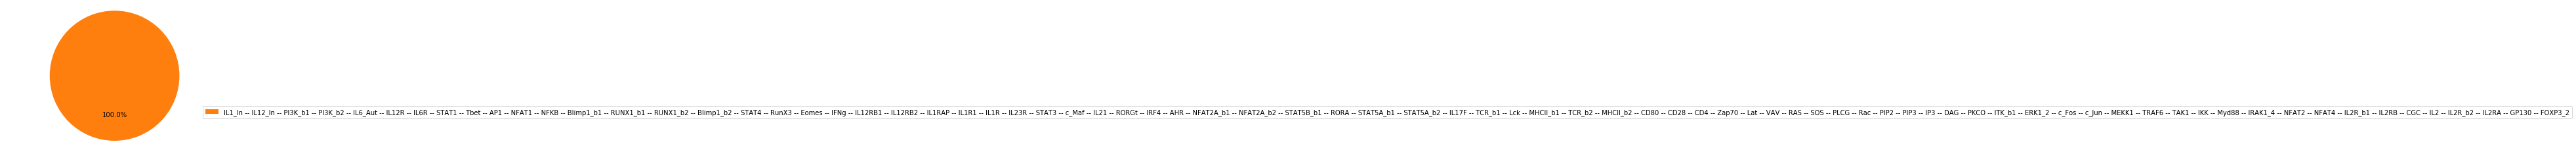

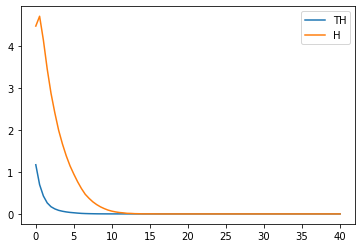

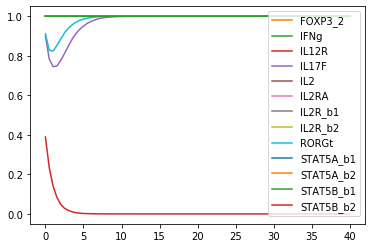

In [114]:
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    

# Defining ON components at initial state, corresponding to IFNg+IL-17F+ phenotype and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("PI3K_b1", "PI3K_b2", "IL6_Aut", "IL12R", "IL6R", "STAT1", "Tbet", "AP1", "NFAT1", "NFKB", "Blimp1_b1", "RUNX1_b2", "Blimp1_b2", "STAT4", "RunX3", "Eomes", "IFNg", "IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL1R", "IL23R", "STAT3", "c_Maf", "IL21", "RORGt", "IRF4", "AHR", "NFAT2A_b1", "NFAT2A_b2", "STAT5B_b1", "RORA", "STAT5A_b1", "STAT5A_b2", "IL17F", "TCR_b1", "Lck", "MHCII_b1", "TCR_b2", "MHCII_b2", "CD80", "CD28", "CD4", "Zap70", "Lat", "VAV", "RAS", "SOS", "PLCG", "Rac", "PIP2", "PIP3", "IP3", "DAG", "PKCO", "ITK_b1", "ERK1_2", "c_Fos", "c_Jun", "MEKK1", "TRAF6", "TAK1", "IKK", "Myd88", "IRAK1_4", "NFAT2", "NFAT4", "IL2R_b1", "IL2RB", "CGC", "IL2", "IL2R_b2", "IL2RA", "GP130", "FOXP3_2", "IL23_In", "IL1_In", "IL6_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("PI3K_b1", "PI3K_b2", "IL6_Aut", "IL12R", "IL6R", "STAT1", "Tbet", "AP1", "NFAT1", "NFKB", "Blimp1_b1", "RUNX1_b2", "Blimp1_b2", "STAT4", "RunX3", "Eomes", "IFNg", "IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL1R", "IL23R", "STAT3", "c_Maf", "IL21", "RORGt", "IRF4", "AHR", "NFAT2A_b1", "NFAT2A_b2", "STAT5B_b1", "RORA", "STAT5A_b1", "STAT5A_b2", "IL17F", "TCR_b1", "Lck", "MHCII_b1", "TCR_b2", "MHCII_b2", "CD80", "CD28", "CD4", "Zap70", "Lat", "VAV", "RAS", "SOS", "PLCG", "Rac", "PIP2", "PIP3", "IP3", "DAG", "PKCO", "ITK_b1", "ERK1_2", "c_Fos", "c_Jun", "MEKK1", "TRAF6", "TAK1", "IKK", "Myd88", "IRAK1_4", "NFAT2", "NFAT4", "IL2R_b1", "IL2RB", "CGC", "IL2", "IL2R_b2", "IL2RA", "GP130", "FOXP3_2", "IL12_In", "IL1_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    print("Entropy (TH) :")
    print(simres.get_entropy_trajectory().iloc[31]) 
    simres.plot_piechart()
    simres.plot_entropy_trajectory(until=40)
    
    # Simulation of wild type
print("Simulation of re-stimulation starting from IL12+IL1B polarized cells with IL12+IL1B input condition")
maboss_simulation(lqm)

    
    
# Reset lqm
lqm = ginsim.to_biolqm(lrg)
# Definition of a function to ease wildtype and mutant simulations
def maboss_simulation(lqm): 
    mbs = biolqm.to_maboss(lqm)
    maboss.set_output(mbs, [ "IL12R", "IL2R_b1", "IL2R_b2", "IL2RA", "TGFBR", "STAT5A_b1", "STAT5A_b2", "FOXP3_2", "SATB1", "MINA","IL2", "IL17A", "IL17F", "IFNg", "STAT5B_b1", "STAT5B_b2", "Smad2", "RORGt", "CXCR4"])


# Defining ON components at initial state, corresponding to IFNg+IL-17F+ phenotype and IL12+IL1B input condition
# Per default, all nodes are set to zero at initial state

#   IL12_IL1B_ON_Nodes = ("PI3K_b1", "PI3K_b2", "IL6_Aut", "IL12R", "IL6R", "STAT1", "Tbet", "AP1", "NFAT1", "NFKB", "Blimp1_b1", "RUNX1_b2", "Blimp1_b2", "STAT4", "RunX3", "Eomes", "IFNg", "IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL1R", "IL23R", "STAT3", "c_Maf", "IL21", "RORGt", "IRF4", "AHR", "NFAT2A_b1", "NFAT2A_b2", "STAT5B_b1", "RORA", "STAT5A_b1", "STAT5A_b2", "IL17F", "TCR_b1", "Lck", "MHCII_b1", "TCR_b2", "MHCII_b2", "CD80", "CD28", "CD4", "Zap70", "Lat", "VAV", "RAS", "SOS", "PLCG", "Rac", "PIP2", "PIP3", "IP3", "DAG", "PKCO", "ITK_b1", "ERK1_2", "c_Fos", "c_Jun", "MEKK1", "TRAF6", "TAK1", "IKK", "Myd88", "IRAK1_4", "NFAT2", "NFAT4", "IL2R_b1", "IL2RB", "CGC", "IL2", "IL2R_b2", "IL2RA", "GP130", "FOXP3_2", "IL23_In", "IL1_In", "IL6_In", "TGFB_In", "CD4", "PIP2", "MHCII_b2", "CD80")
    IL12_IL1B_ON_Nodes = ("PI3K_b1", "PI3K_b2", "IL6_Aut", "IL12R", "IL6R", "STAT1", "Tbet", "AP1", "NFAT1", "NFKB", "Blimp1_b1", "RUNX1_b2", "Blimp1_b2", "STAT4", "RunX3", "Eomes", "IFNg", "IL12RB1", "IL12RB2", "IL1RAP", "IL1R1", "IL1R", "IL23R", "STAT3", "c_Maf", "IL21", "RORGt", "IRF4", "AHR", "NFAT2A_b1", "NFAT2A_b2", "STAT5B_b1", "RORA", "STAT5A_b1", "STAT5A_b2", "IL17F", "TCR_b1", "Lck", "MHCII_b1", "TCR_b2", "MHCII_b2", "CD80", "CD28", "CD4", "Zap70", "Lat", "VAV", "RAS", "SOS", "PLCG", "Rac", "PIP2", "PIP3", "IP3", "DAG", "PKCO", "ITK_b1", "ERK1_2", "c_Fos", "c_Jun", "MEKK1", "TRAF6", "TAK1", "IKK", "Myd88", "IRAK1_4", "NFAT2", "NFAT4", "IL2R_b1", "IL2RB", "CGC", "IL2", "IL2R_b2", "IL2RA", "GP130", "FOXP3_2", "IL12_In", "IL1_In", "CD4", "PIP2", "MHCII_b2", "CD80")
#  
 
# commands to set the initial state, launch the simulation and display the results  
#    maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
    maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
    simres = mbs.run()
    simres.plot_node_trajectory(until=40)

    # Simulation of wild type
maboss_simulation(lqm)